#**KLASIFIKASI STATUS PENUMPANG PADA DATASET SPACESHIP TITANIC MENGGUNAKAN ALGORITMA RANDOM FOREST**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import pandas as pd


# Membaca dataset yang diunggah
train = pd.read_csv("/content/drive/MyDrive/spaceship_titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/spaceship_titanic/test.csv")
# Membuat copy dataset
train_df = train.copy()
test_df = test.copy()

print("Data Train : ")
display(train_df.head())
print()
print("Data Test : ")
display(test_df.head())

Data Train : 


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



Data Test : 


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## EXPLORATORY DATA ANALYSIS (EDA)

### Daftar nama kolom

In [ ]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

### Informasi Umum data training

In [ ]:
# Informasi dataset
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [ ]:
print(train_df.describe(include='all'))

       PassengerId HomePlanet CryoSleep    Cabin  Destination          Age  \
count         8693       8492      8476     8494         8511  8514.000000   
unique        8693          3         2     6560            3          NaN   
top        9280_02      Earth     False  G/734/S  TRAPPIST-1e          NaN   
freq             1       4602      5439        8         5915          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.827930   
std            NaN        NaN       NaN      NaN          NaN    14.489021   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    27.000000   
75%            NaN        NaN       NaN      NaN          NaN    38.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall        

### Jumlah baris & kolom

In [ ]:
# Jumlah baris dan kolom dataset train
baris_train, kolom_train = train_df.shape
print(f"Jumlah baris dan kolom pada dataset train: {baris_train} baris, {kolom_train} kolom")

# Jumlah baris dan kolom dataset test
baris_test, kolom_test = test_df.shape
print(f"Jumlah baris dan kolom pada dataset test : {baris_test} baris, {kolom_test} kolom")

Jumlah baris dan kolom pada dataset train: 8693 baris, 14 kolom
Jumlah baris dan kolom pada dataset test : 4277 baris, 13 kolom


### Distribusi Label Transported

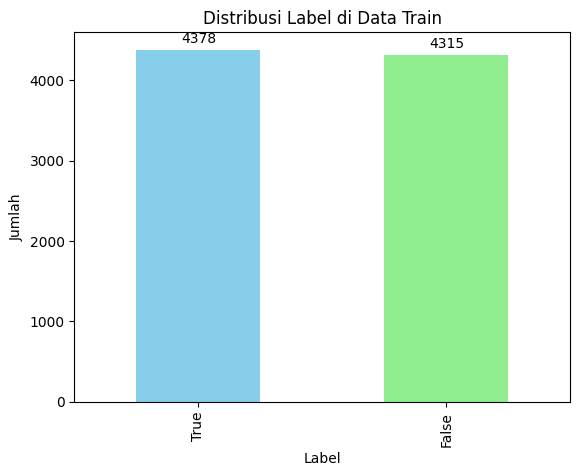

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah tiap label
label_counts = train_df['Transported'].value_counts()

# Plot bar chart
label_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribusi Label di Data Train')
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Tambahkan jumlah di atas batang
for i, count in enumerate(label_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

### visualisasi variabel kategorikal

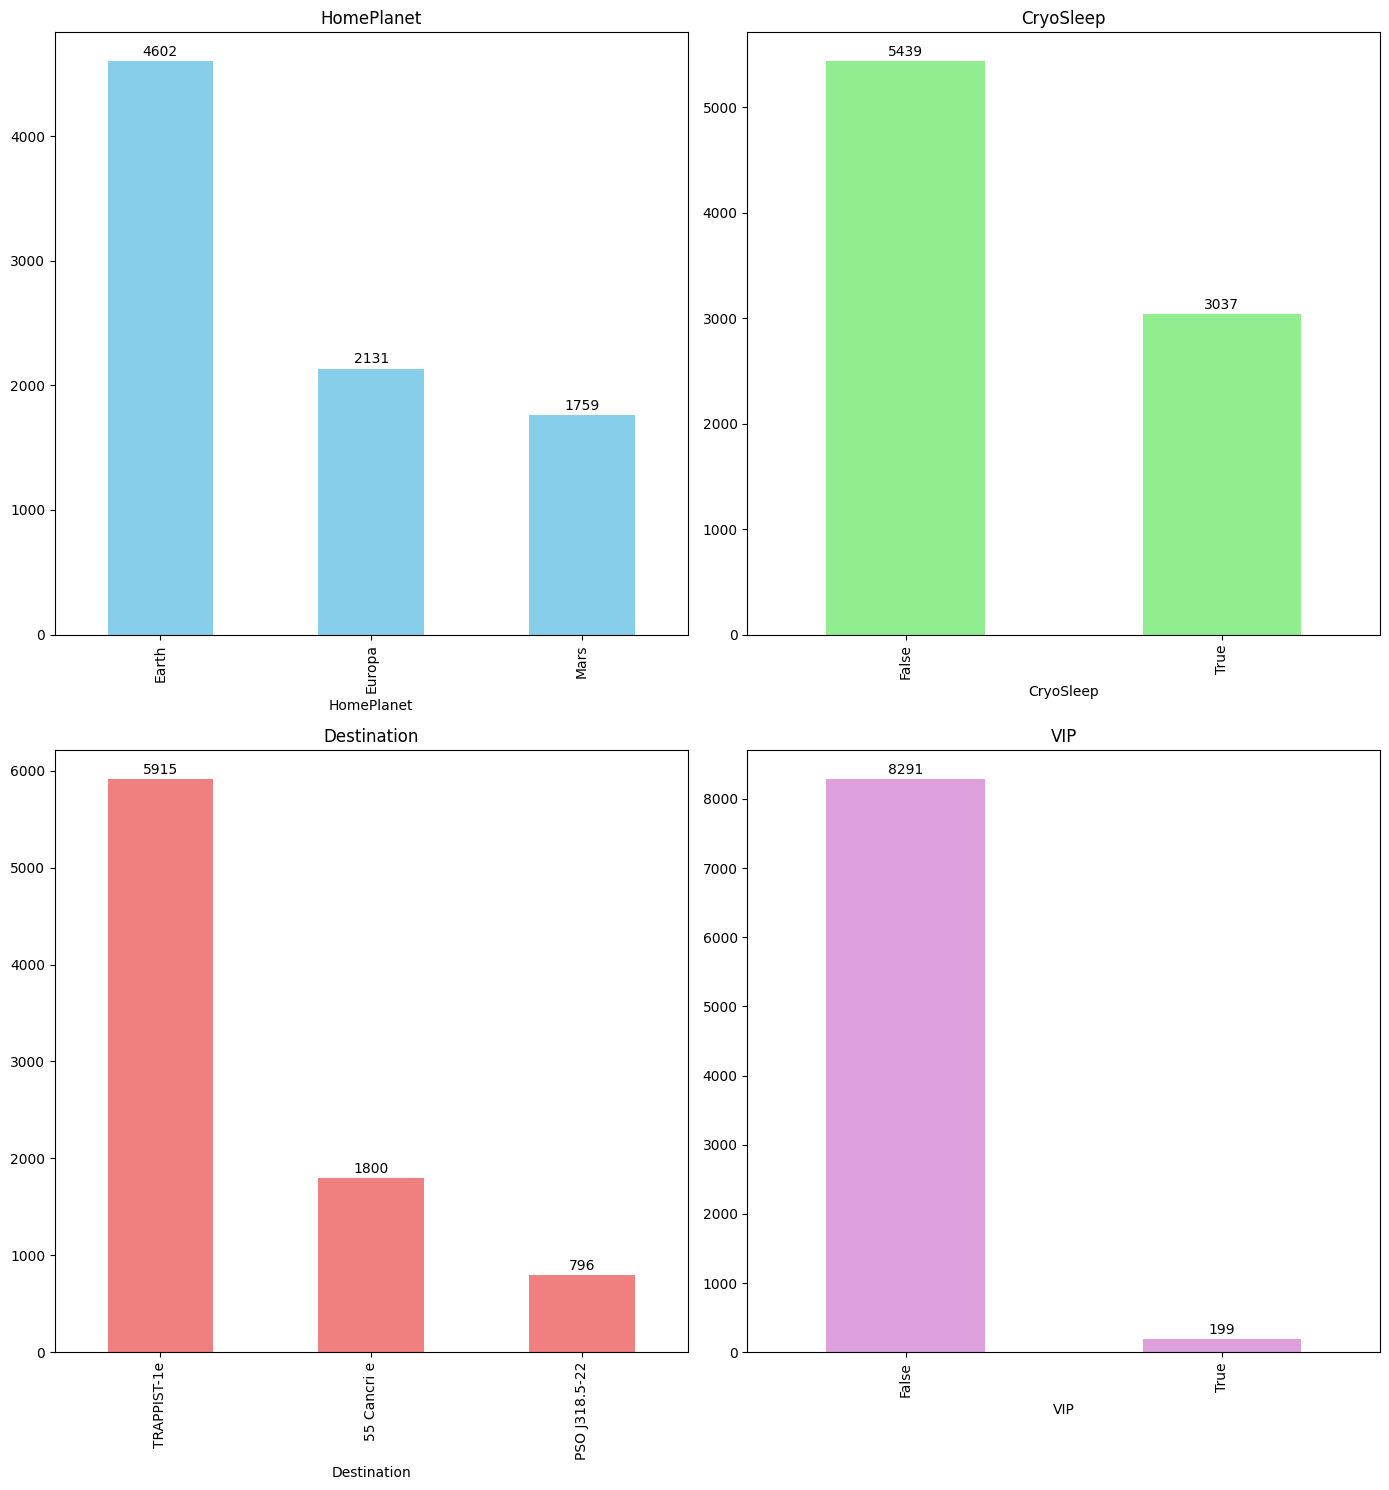

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 15))

# Subplot 1 - HomePlanet
plt.subplot(221)
counts = train_df['HomePlanet'].value_counts()
counts.plot.bar(title='HomePlanet', color='skyblue')
for i, v in enumerate(counts):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10)

# Subplot 2 - CryoSleep
plt.subplot(222)
counts = train_df['CryoSleep'].value_counts()
counts.plot.bar(title='CryoSleep', color='lightgreen')
for i, v in enumerate(counts):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10)

# Subplot 3 - Destination
plt.subplot(223)
counts = train_df['Destination'].value_counts()
counts.plot.bar(title='Destination', color='lightcoral')
for i, v in enumerate(counts):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10)

# Subplot 4 - VIP
plt.subplot(224)
counts = train_df['VIP'].value_counts()
counts.plot.bar(title='VIP', color='plum')
for i, v in enumerate(counts):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Visualisasi Cabin deck dan Cabin side

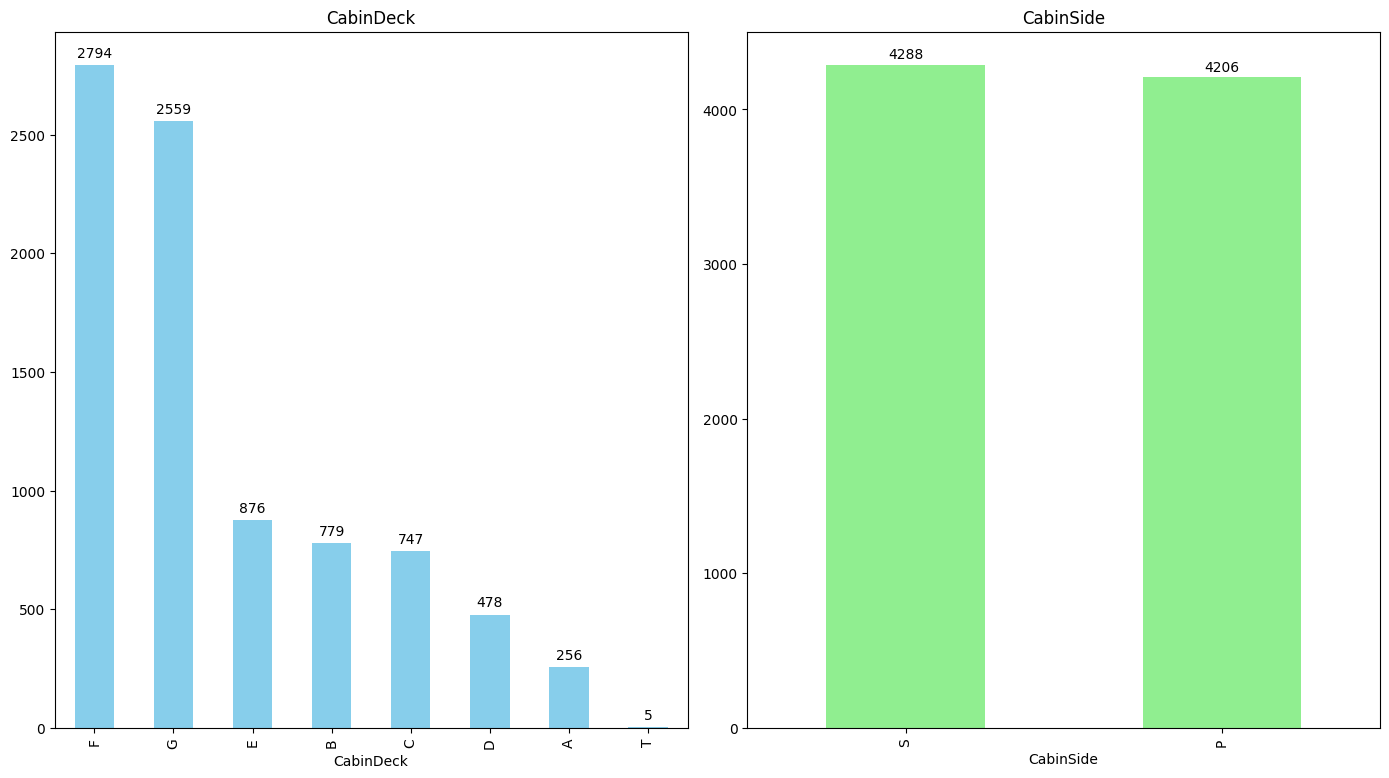

In [ ]:
# Extract CabinDeck, CabinNo. and CabinSide feature from Cabin
train_df[["CabinDeck", "CabinNo.", "CabinSide"]] = train_df["Cabin"].str.split('/', expand=True)

# Visualize cabin feature
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 15))

# Subplot 1 - CabinDeck
plt.subplot(221)
counts = train_df['CabinDeck'].value_counts()
counts.plot.bar(title='CabinDeck', color='skyblue')
for i, v in enumerate(counts):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10)

# Subplot 2 - CabinSide
plt.subplot(222)
counts = train_df['CabinSide'].value_counts()
counts.plot.bar(title='CabinSide', color='lightgreen')
for i, v in enumerate(counts):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Visualisasi Fitur Numerik

/tmp/ipython-input-132764284.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age']);


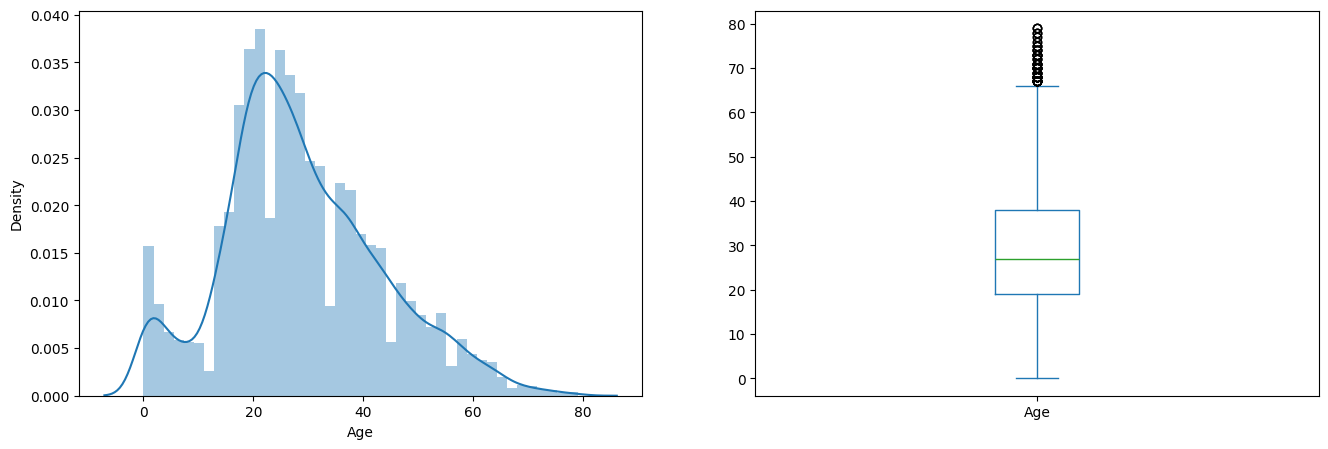

In [ ]:
import seaborn as sns
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Age']);
plt.subplot(122)
train_df['Age'].plot.box(figsize = (16, 5));
plt.show()

* Median usia sekitar 25 tahun.
* Mayoritas usia berada di antara 20–40 tahun.
* Ada beberapa orang dengan umur hingga 70–80 tahun, tapi jumlahnya sedikit (muncul sebagai titik outlier).

### Room service outlier

/tmp/ipython-input-1586182954.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['RoomService']);


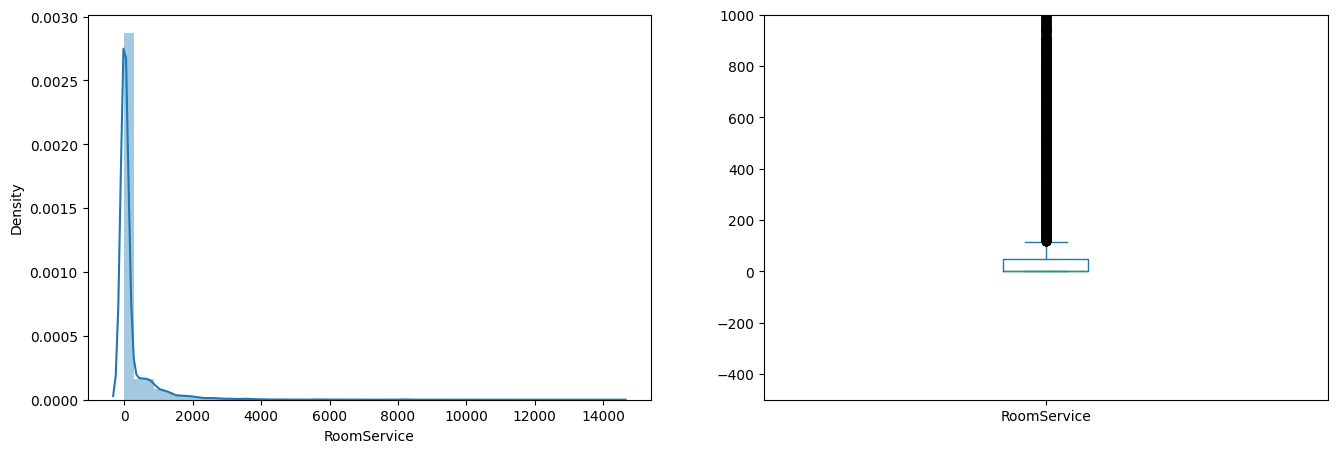

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['RoomService']);
plt.subplot(122)
train_df['RoomService'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

Density plot :
* Sebagian besar nilai berada di dekat 0, artinya banyak penumpang tidak menggunakan RoomService sama sekali atau hanya mengeluarkan sedikit biaya.
* Distribusi sangat miring ke kanan (right-skewed) — ada beberapa penumpang yang mengeluarkan jumlah sangat besar (hingga >10.000), tapi jumlahnya sangat sedikit.
* Hanya segelintir penumpang yang memiliki pengeluaran RoomService besar, mereka menjadi outlier.
* Distribusi RoomService sangat tidak merata (highly skewed).

### SPA Outlier

/tmp/ipython-input-4266694715.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Spa']);


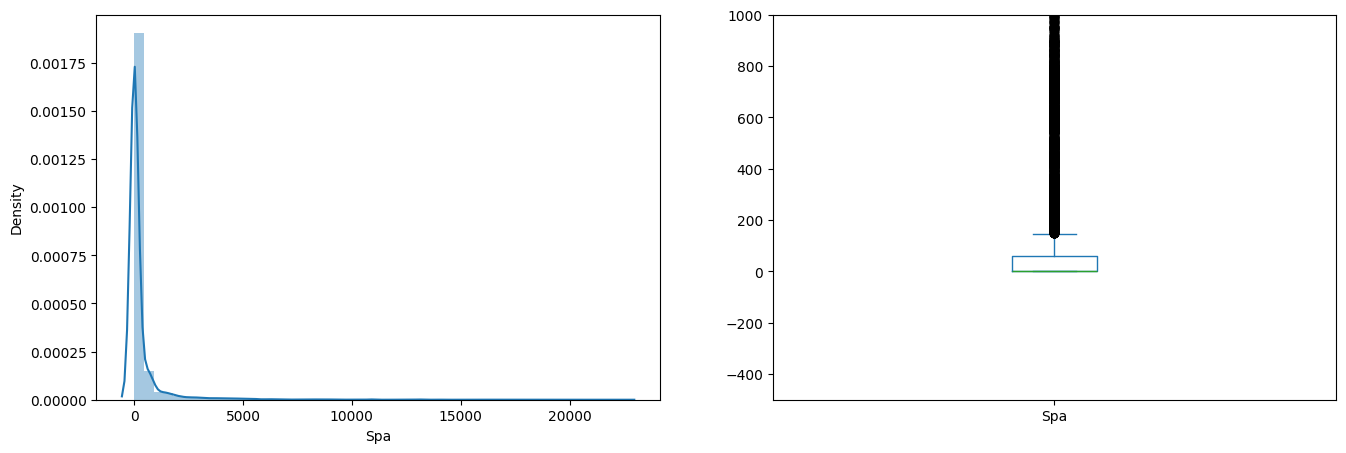

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Spa']);
plt.subplot(122)
train_df['Spa'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

* Distribusinya mirip dengan distribusi RoomService. Distribusi ini mengandung banyak nilai outlier dan tidak mengikuti distribusi normal.

### VRDECK Outlier

/tmp/ipython-input-850432194.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['VRDeck']);


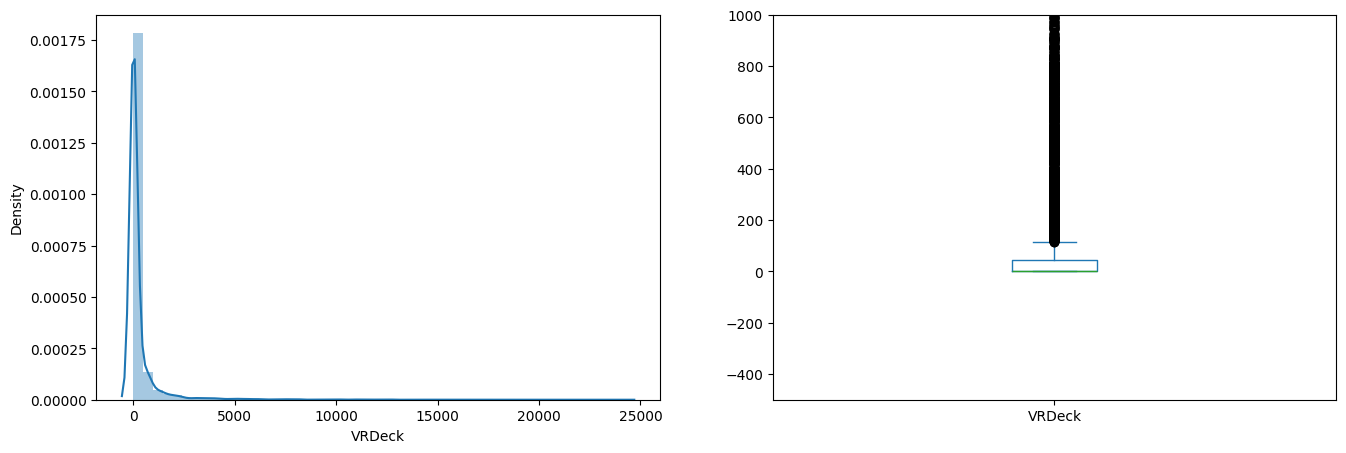

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['VRDeck']);
plt.subplot(122)
train_df['VRDeck'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

### Foodcourt outlier

/tmp/ipython-input-1487953047.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['FoodCourt']);


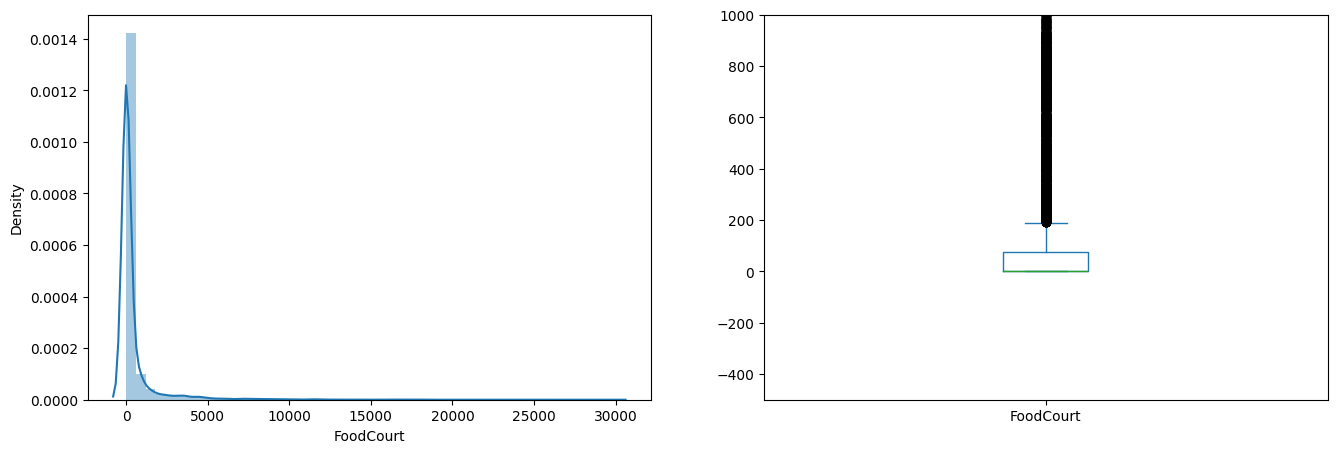

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['FoodCourt']);
plt.subplot(122)
train_df['FoodCourt'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

### shopping mall outlier

/tmp/ipython-input-2034949521.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['ShoppingMall']);


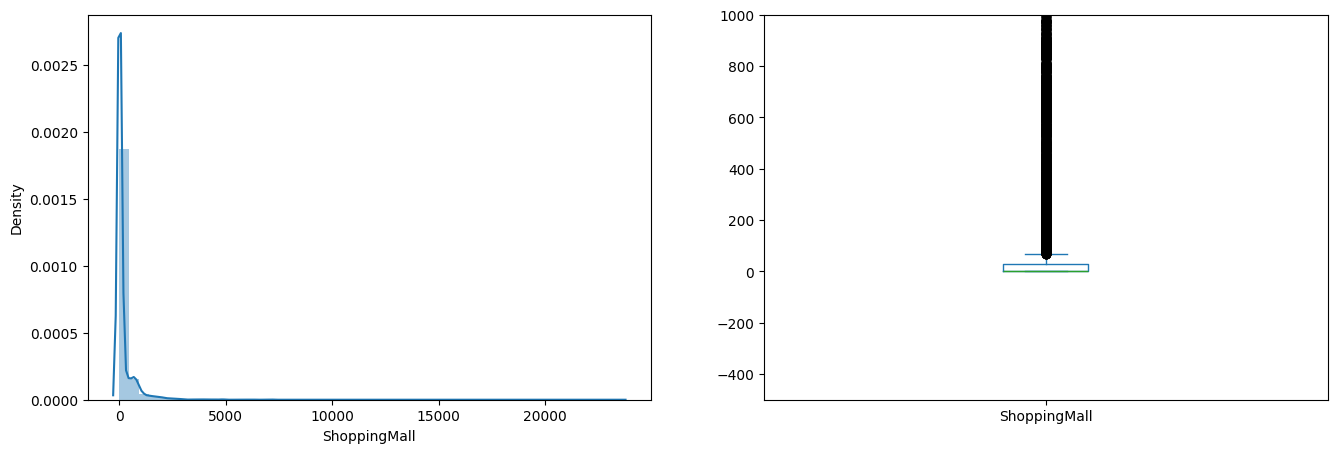

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['ShoppingMall']);
plt.subplot(122)
train_df['ShoppingMall'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

* RoomService, FoodCourt, ShoppingMall, Spa, dan VRDeck merupakan jumlah tagihan yang dibayarkan penumpang di masing-masing fasilitas mewah di Kapal Luar Angkasa Titanic. Hasilnya VRDeck, FoodCourt, dan ShoppingMall memiliki distribusi yang tidak normal dan memiliki outlier

### Analisis fitur kategorikal dengan label

membuat dataframe untuk menyimpan jumlah penumpang yang diangkut, serta persentase penumpang yang diangkut untuk setiap variabel kategorikal.



In [ ]:
HomePlanet_Transported = train_df.groupby('HomePlanet').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

HomePlanet_Transported['TransportedPercentage'] = HomePlanet_Transported['Transported'] / HomePlanet_Transported['PassengerId']

CryoSleep_Transported = train_df.groupby('CryoSleep').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CryoSleep_Transported['TransportedPercentage'] = CryoSleep_Transported['Transported'] / CryoSleep_Transported['PassengerId']

Destination_Transported = train_df.groupby('Destination').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Destination_Transported['TransportedPercentage'] = Destination_Transported['Transported'] / Destination_Transported['PassengerId']

VIP_Transported = train_df.groupby('VIP').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

VIP_Transported['TransportedPercentage'] = VIP_Transported['Transported'] / VIP_Transported['PassengerId']

<Axes: xlabel='VIP', ylabel='TransportedPercentage'>

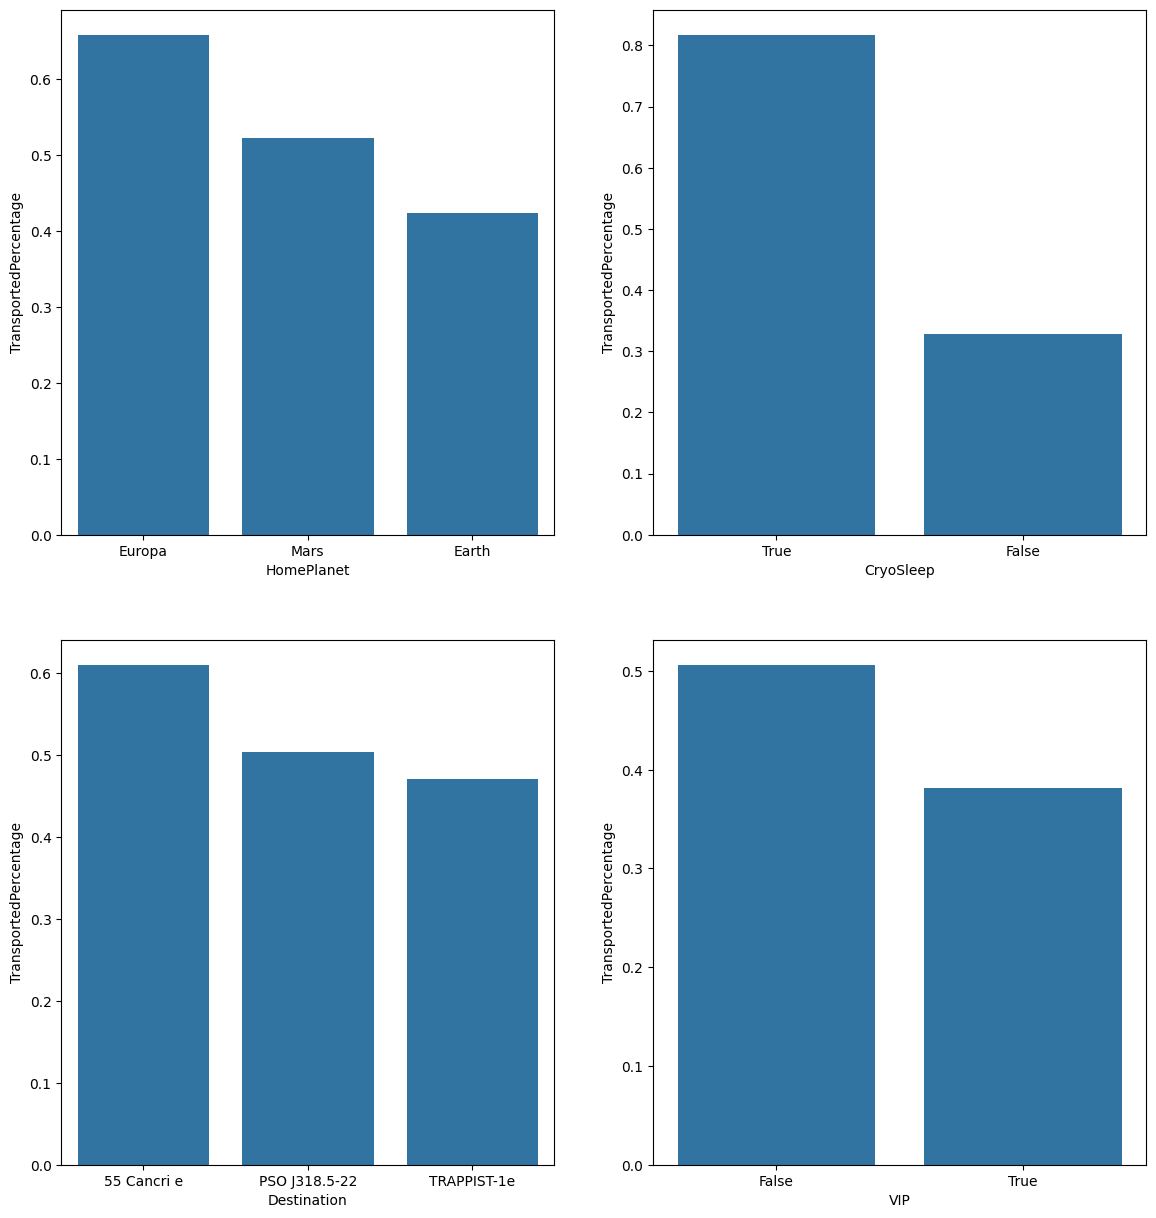

In [ ]:
plt.figure(figsize = (14, 15))
plt.subplot(221)
sns.barplot(x = "HomePlanet", y = "TransportedPercentage", data = HomePlanet_Transported, order = HomePlanet_Transported.sort_values('TransportedPercentage', ascending = False).HomePlanet)
plt.subplot(222)
sns.barplot(x = "CryoSleep", y = "TransportedPercentage", data = CryoSleep_Transported, order = CryoSleep_Transported.sort_values('TransportedPercentage', ascending = False).CryoSleep)
plt.subplot(223)
sns.barplot(x = "Destination", y = "TransportedPercentage", data = Destination_Transported, order = Destination_Transported.sort_values('TransportedPercentage', ascending = False).Destination)
plt.subplot(224)
sns.barplot(x = "VIP", y = "TransportedPercentage", data = VIP_Transported, order = VIP_Transported.sort_values('TransportedPercentage', ascending = False).VIP)

Cabin-label

<Axes: xlabel='CabinSide', ylabel='TransportedPercentage'>

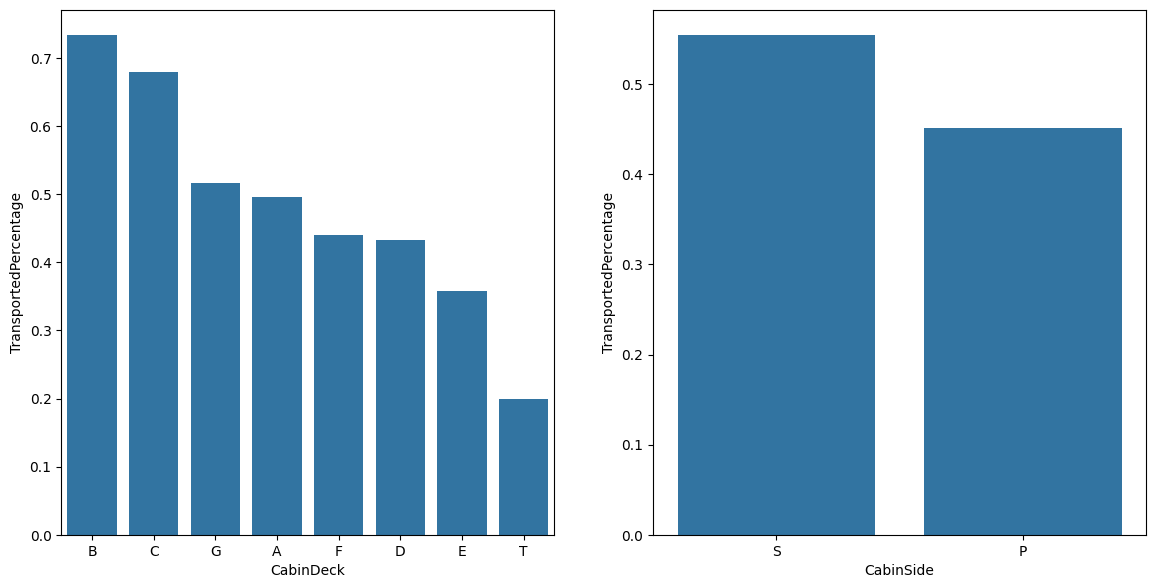

In [ ]:
CabinDeck_Transported = train_df.groupby('CabinDeck').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinDeck_Transported['TransportedPercentage'] = CabinDeck_Transported['Transported'] / CabinDeck_Transported['PassengerId']

CabinSide_Transported = train_df.groupby('CabinSide').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinSide_Transported['TransportedPercentage'] = CabinSide_Transported['Transported'] / CabinSide_Transported['PassengerId']

# Visualize Cabin features vs target variable
plt.figure(figsize = (14, 15))
plt.subplot(221)
sns.barplot(x = "CabinDeck", y = "TransportedPercentage", data = CabinDeck_Transported, order = CabinDeck_Transported.sort_values('TransportedPercentage', ascending = False).CabinDeck)
plt.subplot(222)
sns.barplot(x = "CabinSide", y = "TransportedPercentage", data = CabinSide_Transported, order = CabinSide_Transported.sort_values('TransportedPercentage', ascending = False).CabinSide)


* Dek tempat penumpang tinggal memengaruhi kemungkinan mereka ditransportasikan.
Dek seperti B dan C cenderung memiliki persentase tertinggi, mungkin karena karakteristik penumpang di sana (lebih tenang, banyak yang dalam CryoSleep).
Sedangkan F dan G cenderung lebih rendah, bisa jadi karena aktivitas atau fasilitas di sana berbeda.

* Walaupun perbedaannya tidak sebesar CryoSleep atau HomePlanet, tetap terlihat sedikit tren bahwa penumpang di sisi Starboard lebih sering ditransportasikan dibanding sisi Port.
Namun, efeknya lemah atau sedang — artinya CabinSide tidak sekuat fitur-fitur lain dalam menentukan label.

### ALone / not alone - label

In [ ]:
# Extract the group ID from PassengerId
train_df["PassengerGroup"] = train_df["PassengerId"].apply(lambda x: str(x).split("_")[0])

# Create a dataframe with the number of people in each passenger group
No_People_In_PassengerGroup = train_df.groupby('PassengerGroup')['PassengerId'].count().reset_index()
No_People_In_PassengerGroup = No_People_In_PassengerGroup.rename(columns = {"PassengerId": "NoInPassengerGroup"})

display(No_People_In_PassengerGroup.head())

,PassengerGroup,NoInPassengerGroup
0,0001,1
1,0002,1
2,0003,2
3,0004,1
4,0005,1


<Axes: xlabel='IsAlone', ylabel='TransportedPercentage'>

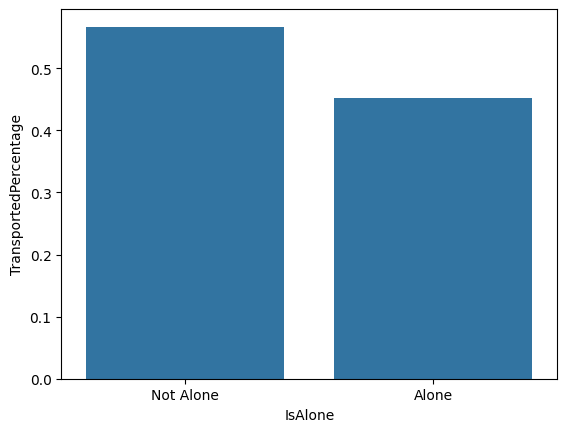

In [ ]:
No_People_In_PassengerGroup["IsAlone"] = No_People_In_PassengerGroup["NoInPassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")
train_df = train_df.merge(No_People_In_PassengerGroup[["PassengerGroup", "IsAlone"]], how = 'left', on = ['PassengerGroup'])

IsAlone_Transported = train_df.groupby('IsAlone').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe IsAlone_Transported that contains percentage of passengers transported Alone or Not Alone
IsAlone_Transported['TransportedPercentage'] = IsAlone_Transported['Transported'] / IsAlone_Transported['PassengerId']

# Visualize IsAlone vs transported
sns.barplot(x = "IsAlone", y = "TransportedPercentage", data = IsAlone_Transported, order = IsAlone_Transported.sort_values('TransportedPercentage', ascending = False).IsAlone)


Sepertinya lebih banyak Penumpang yang tidak sendirian yang dipindahkan ke dimensi lain dibandingkan dengan Penumpang yang sendirian.
Kolom Nama juga berisi nama depan dan belakang Penumpang. Jadi, mari kita ekstrak Nama Keluarga (nama belakang) dari setiap Penumpang untuk melihat apakah ukuran keluarga dapat memengaruhi apakah Penumpang dipindahkan atau tidak.

### Ukuran Keluarga -label



/tmp/ipython-input-1243789637.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  FamilySizeCat_Transported = train_df.groupby('FamilySizeCat').aggregate({'Transported': 'sum',


<Axes: xlabel='FamilySizeCat', ylabel='TransportedPercentage'>

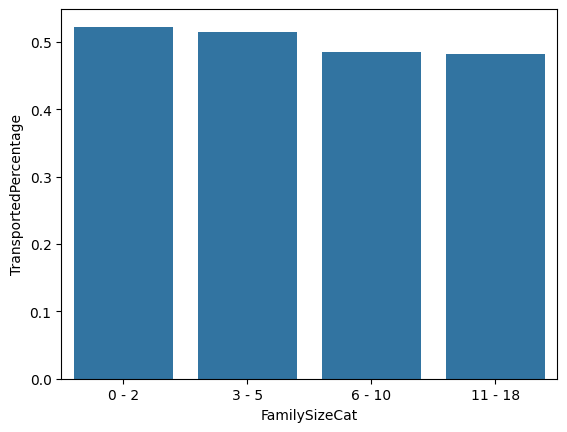

In [ ]:
train_df["FamilyName"] = train_df["Name"].str.split(' ', expand = True)[1]

# Create dataframe -NoRelatives that contains the FamilyName and the no of relatives in a Family
NoRelatives = train_df.groupby('FamilyName')['PassengerId'].count().reset_index()
NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NoRelatives"})

train_df = train_df.merge(NoRelatives[["FamilyName", "NoRelatives"]], how = 'left', on = ['FamilyName'])

train_df["FamilySizeCat"] = pd.cut(train_df.NoRelatives, bins = [0, 2, 5, 10, 18], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 18'])

# create dataframe FamilySizeCat_Transported that has the Family Size Category and the percentage transported
FamilySizeCat_Transported = train_df.groupby('FamilySizeCat').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

FamilySizeCat_Transported['TransportedPercentage'] = FamilySizeCat_Transported['Transported'] / FamilySizeCat_Transported['PassengerId']

# Visualize FamilySizeCat vs transported
sns.barplot(x = "FamilySizeCat", y = "TransportedPercentage", data = FamilySizeCat_Transported, order = FamilySizeCat_Transported.sort_values('TransportedPercentage', ascending = False).FamilySizeCat)

Persentase keluarga kecil yang diangkut lebih tinggi daripada keluarga besar. Hal ini mungkin disebabkan karena keluarga kecil adalah keluarga kaya, dan mereka diangkut. Mari kita lihat bagaimana ukuran keluarga memengaruhi pendapatan.

Untuk melakukannya, kita akan menjumlahkan semua jumlah yang dibebankan kepada setiap penumpang di setiap fasilitas mewah Kapal Luar Angkasa Titanic. Kemudian, kita akan memplotnya terhadap FamilySizeCat.

### family size - total spending

(-800.0, 12000.0)

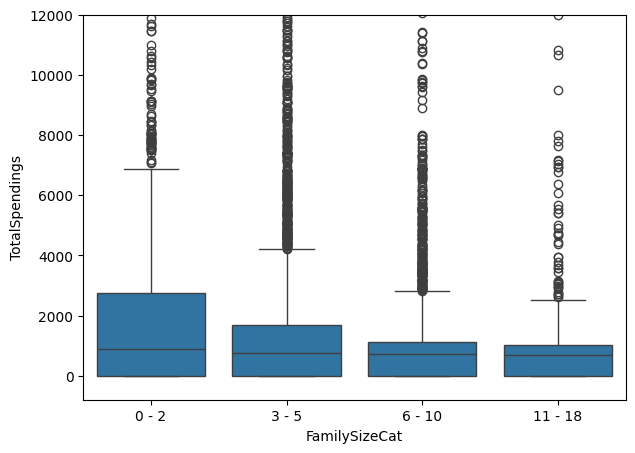

In [ ]:
train_df["TotalSpendings"] = train_df["FoodCourt"] + \
                                 train_df["ShoppingMall"] + \
                                 train_df["RoomService"] + \
                                 train_df["Spa"] + \
                                 train_df["VRDeck"]

# FamilySizeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df, x = "FamilySizeCat", y = "TotalSpendings")
plt.ylim([-800, 12000])

 Penumpang dengan ukuran keluarga yang lebih kecil cenderung lebih kaya.

### Umur - label

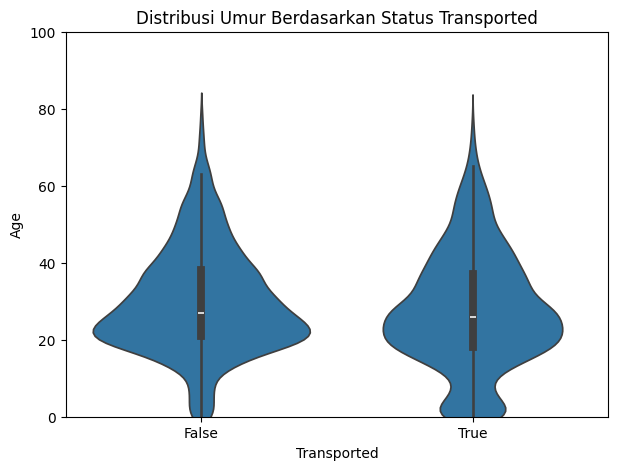

In [ ]:
plt.figure(figsize=(7, 5))
sns.violinplot(x="Transported", y="Age", data=train_df)
plt.ylim([0, 100])  # batas umur lebih realistis
plt.title("Distribusi Umur Berdasarkan Status Transported")
plt.show()


* Paling banyak penumpang berumur sekitar 20–40 tahun.
* Ada sedikit penumpang usia sangat muda (0–10 tahun) dan beberapa dewasa tua (60+).
* Median (garis putih) keduanya hampir sama — artinya umur bukan faktor yang terlalu membedakan antara yang Transported dan tidak.

### Kategori umur - label

/tmp/ipython-input-1628969224.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AgeCat_Transported = train_df.groupby('AgeCat').aggregate({


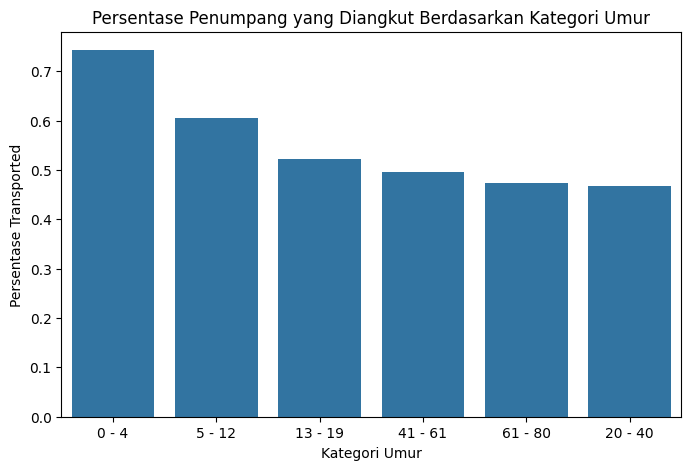

In [ ]:
# Membuat kategori umur
train_df["AgeCat"] = pd.cut(
    train_df["Age"],
    bins=[0.0, 4.0, 12.0, 19.0, 40.0, 60.0, 80.0],
    labels=['0 - 4', '5 - 12', '13 - 19', '20 - 40', '41 - 61', '61 - 80']
)

# Menghitung jumlah dan persentase penumpang yang diangkut per kategori umur
AgeCat_Transported = train_df.groupby('AgeCat').aggregate({
    'Transported': 'sum',
    'PassengerId': 'size'
}).reset_index()

AgeCat_Transported['TransportedPercentage'] = (
    AgeCat_Transported['Transported'] / AgeCat_Transported['PassengerId']
)

# Visualisasi kategori umur vs persentase yang diangkut
plt.figure(figsize=(8, 5))
sns.barplot(
    x="AgeCat",
    y="TransportedPercentage",
    data=AgeCat_Transported,
    order=AgeCat_Transported.sort_values('TransportedPercentage', ascending=False)['AgeCat']
)
plt.title("Persentase Penumpang yang Diangkut Berdasarkan Kategori Umur")
plt.ylabel("Persentase Transported")
plt.xlabel("Kategori Umur")
plt.show()


* Sekitar 74% penumpang dalam rentang usia 0–4 tahun di transported.
* Sekitar 60% penumpang dalam rentang usia 5–12 tahun diangkut.

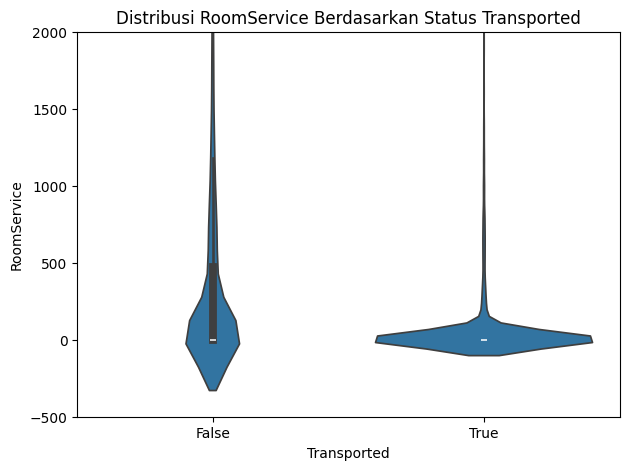

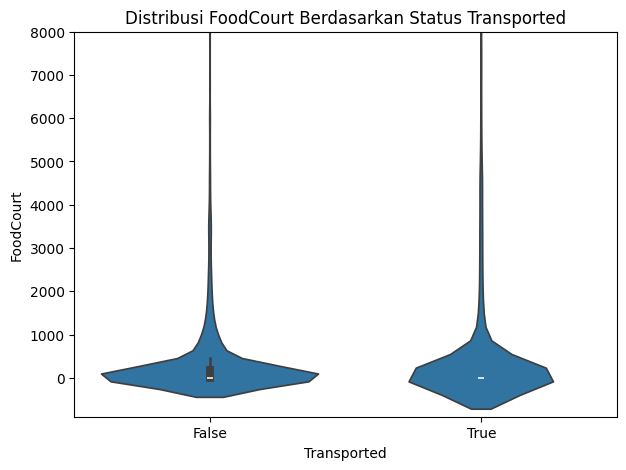

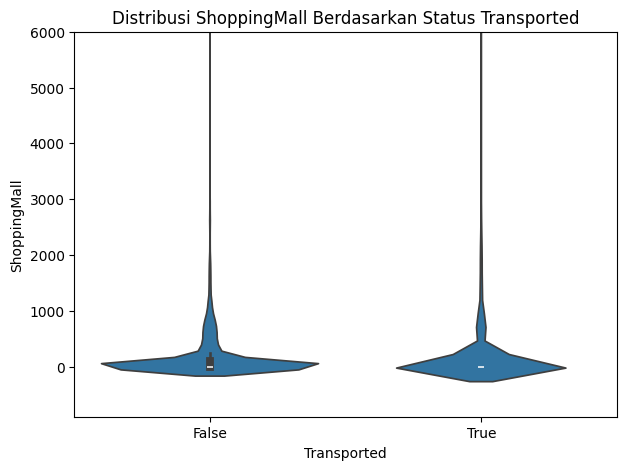

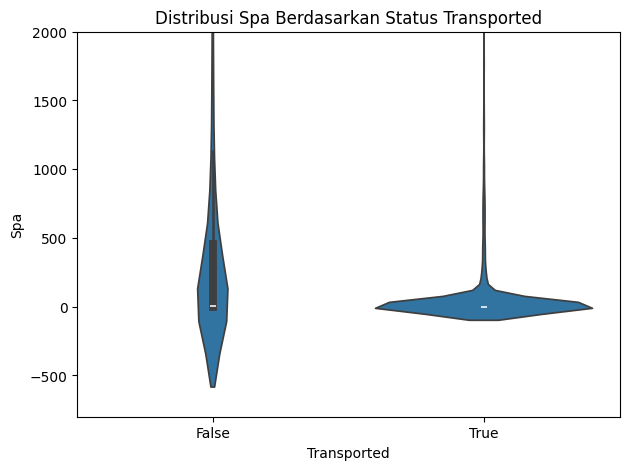

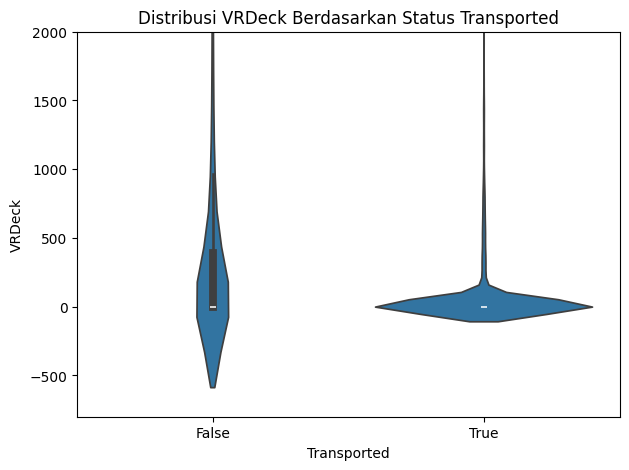

In [ ]:
plt.figure(figsize=(7, 5))
sns.violinplot(x="Transported", y="RoomService", data=train_df)
plt.ylim([-500, 2000])
plt.title("Distribusi RoomService Berdasarkan Status Transported")

plt.figure(figsize=(7, 5))
sns.violinplot(x="Transported", y="FoodCourt", data=train_df)
plt.ylim([-900, 8000])
plt.title("Distribusi FoodCourt Berdasarkan Status Transported")

plt.figure(figsize=(7, 5))
sns.violinplot(x="Transported", y="ShoppingMall", data=train_df)
plt.ylim([-900, 6000])
plt.title("Distribusi ShoppingMall Berdasarkan Status Transported")

plt.figure(figsize=(7, 5))
sns.violinplot(x="Transported", y="Spa", data=train_df)
plt.ylim([-800, 2000])
plt.title("Distribusi Spa Berdasarkan Status Transported")

plt.figure(figsize=(7, 5))
sns.violinplot(x="Transported", y="VRDeck", data=train_df)
plt.ylim([-800, 2000])
plt.title("Distribusi VRDeck Berdasarkan Status Transported")

plt.show()


Tagihan yang dikeluarkan oleh penumpang yang diangkut tampaknya terkonsentrasi dan mendekati nol.


VRDeck, Spa, dan RoomService tampaknya memiliki distribusi yang serupa, sementara ShoppingMall dan RoomServices tampaknya memiliki distribusi yang serupa.

Kami telah melihat bagaimana ukuran keluarga memengaruhi pengeluaran. Sekarang mari kita lihat bagaimana penumpang yang dipilih dalam Cryosleep berhubungan dengan pengeluaran.

### cryosleep - total spending

(-900.0, 14000.0)

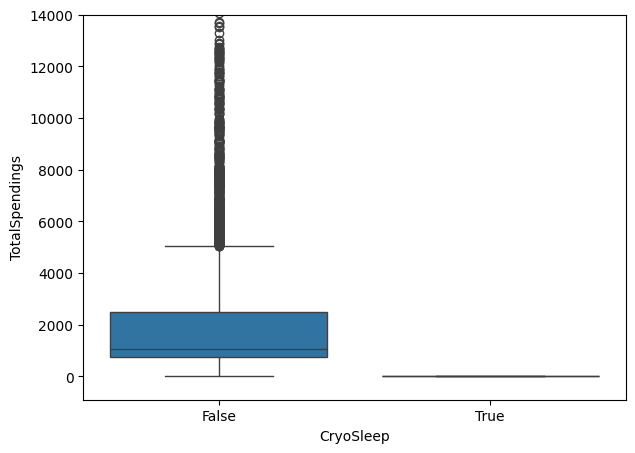

In [ ]:
plt.figure(figsize = (7, 5))

sns.boxplot(data = train_df, x = "CryoSleep", y = "TotalSpendings")
plt.ylim([-900, 14000])

Dari grafik di atas dapat dilihat bahwa penumpang yang berada dalam CryoSleep memiliki pengeluaran sebesar 0. Sekarang mari kita lihat bagaimana status VIP memengaruhi pengeluaran.

(-800.0, 12000.0)

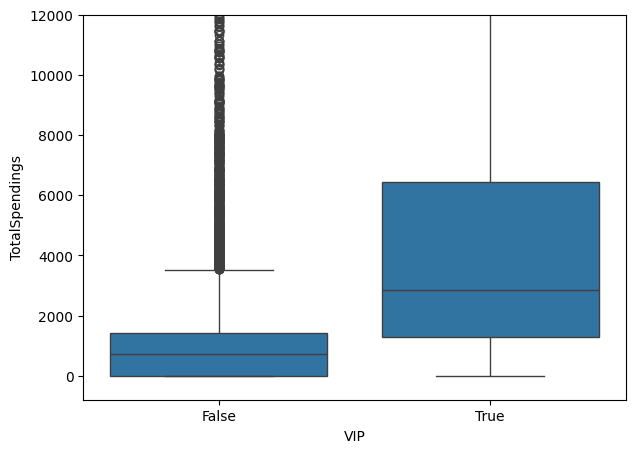

In [ ]:
# VIP vs TotalSpendings
plt.figure(figsize = (7, 5))

sns.boxplot(data = train_df, x = "VIP", y = "TotalSpendings")
plt.ylim([-800, 12000])

Dapat dilihat bahwa penumpang dengan status VIP memiliki pengeluaran yang lebih tinggi dibandingkan dengan penumpang yang tidak memiliki status tersebut.

(-800.0, 12000.0)

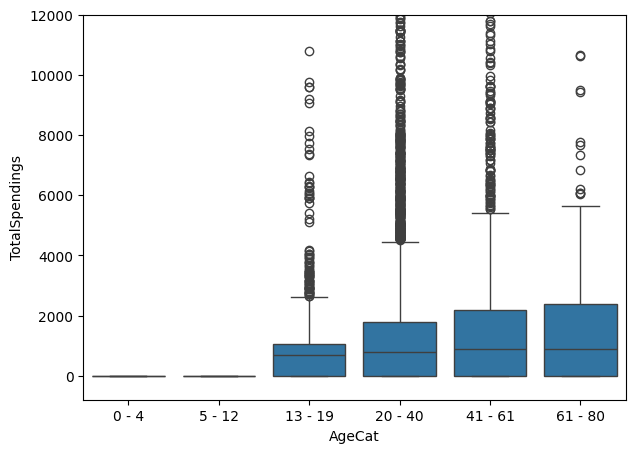

In [ ]:
# AgeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df, x = "AgeCat", y = "TotalSpendings")
plt.ylim([-800, 12000])

* Penumpang dalam rentang usia 0–12 tahun tidak mengeluarkan biaya

* Pengeluaran meningkat seiring dengan usia

### Cek Missing Values

Jumlah Missing Value setiap fitur data train : 
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


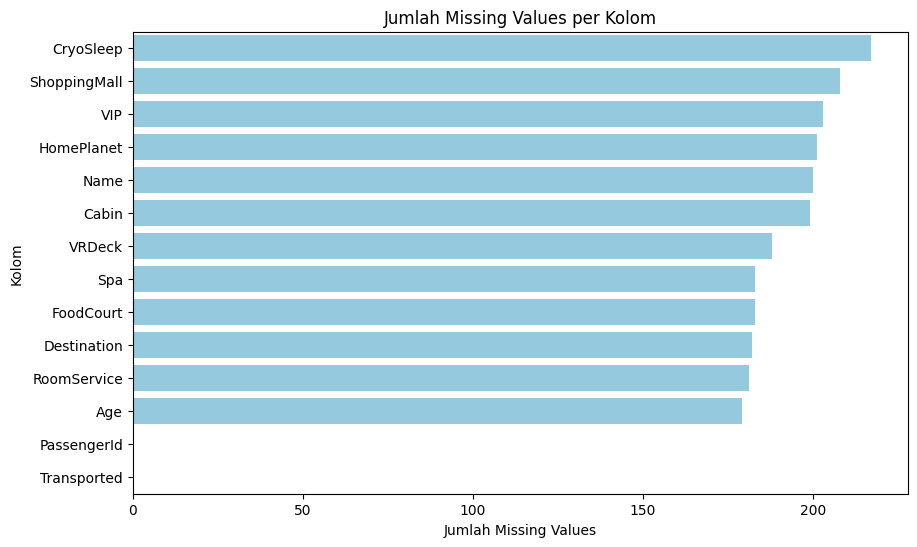

Jumlah Missing Value setiap fitur data test : 
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
VIP              93
CryoSleep        93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


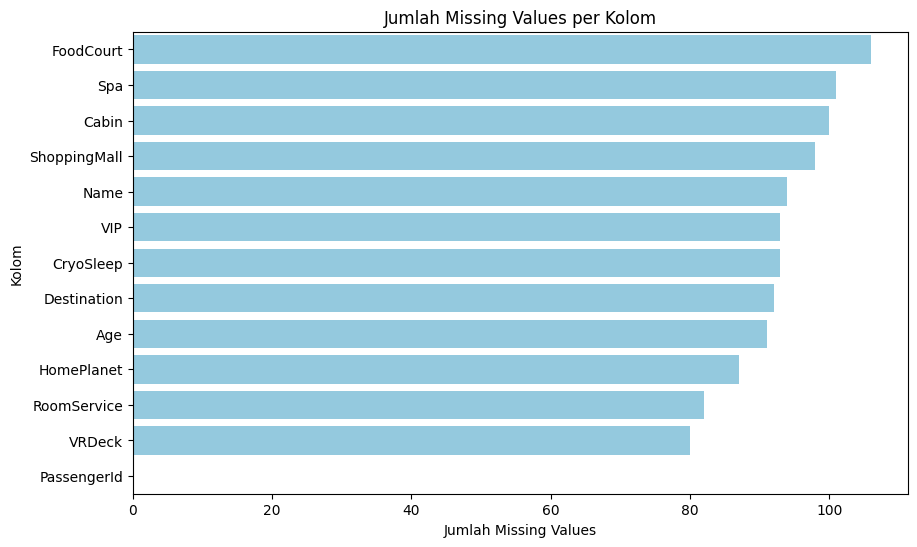

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

missing_values_train = train.isnull().sum().sort_values(ascending=False)
print("Jumlah Missing Value setiap fitur data train : ")
print(missing_values_train)
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values_train.values, y=missing_values_train.index, color='skyblue')
plt.title("Jumlah Missing Values per Kolom")
plt.xlabel("Jumlah Missing Values")
plt.ylabel("Kolom")
plt.show()

missing_values_test = test.isnull().sum().sort_values(ascending=False)
print("Jumlah Missing Value setiap fitur data test : ")
print(missing_values_test)
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values_test.values, y=missing_values_test.index, color='skyblue')
plt.title("Jumlah Missing Values per Kolom")
plt.xlabel("Jumlah Missing Values")
plt.ylabel("Kolom")

plt.show()

### Mendeteksi duplikat

In [ ]:
train.duplicated().sum()
test.duplicated().sum()

np.int64(0)

# PREPROCESSING

## Penanganan Nilai Hilang (Missing Values)

### import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split

### Cek presentase Missing value

In [ ]:
# --- Hubungkan Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- Tentukan path file CSV di Google Drive ---
# Ganti path di bawah sesuai lokasi folder kamu di Google Drive
train_path = '/content/drive/MyDrive/spaceship_titanic/train.csv'
test_path  = '/content/drive/MyDrive/spaceship_titanic/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# --- Tampilkan informasi dasar ---
print("✅ File berhasil dibaca.")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}\n")

# --- Cek persentase missing value pada TRAIN ---
print("🔍 Persentase Missing Value pada TRAIN (semua kolom):")
missing_train = round(train.isna().sum() * 100 / train.shape[0], 3)
missing_train_df = pd.DataFrame({
    'Kolom': missing_train.index,
    'Persentase Missing (%)': missing_train.values
})
print(missing_train_df.to_string(index=False))

# --- Cek persentase missing value pada TEST ---
print("\n🔍 Persentase Missing Value pada TEST (semua kolom):")
missing_test = round(test.isna().sum() * 100 / test.shape[0], 3)
missing_test_df = pd.DataFrame({
    'Kolom': missing_test.index,
    'Persentase Missing (%)': missing_test.values
})
print(missing_test_df.to_string(index=False))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File berhasil dibaca.
Train shape: (8693, 14)
Test shape: (4277, 13)

🔍 Persentase Missing Value pada TRAIN (semua kolom):
       Kolom  Persentase Missing (%)
 PassengerId                   0.000
  HomePlanet                   2.312
   CryoSleep                   2.496
       Cabin                   2.289
 Destination                   2.094
         Age                   2.059
         VIP                   2.335
 RoomService                   2.082
   FoodCourt                   2.105
ShoppingMall                   2.393
         Spa                   2.105
      VRDeck                   2.163
        Name                   2.301
 Transported                   0.000

🔍 Persentase Missing Value pada TEST (semua kolom):
       Kolom  Persentase Missing (%)
 PassengerId                   0.000
  HomePlanet                   2.034
   CryoSleep               

Output tersebut menunjukkan bahwa file `train.csv` dan `test.csv` berhasil dibaca dengan benar oleh program, di mana dataset train memiliki 8.693 baris dan 14 kolom, sedangkan dataset test memiliki 4.277 baris dan 13 kolom karena tidak memuat kolom target `Transported`. Dari hasil pemeriksaan persentase missing value, terlihat bahwa hampir semua kolom pada kedua dataset memiliki nilai hilang sekitar 2%, seperti pada kolom `HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `Age`, `VIP`, serta berbagai kolom pengeluaran seperti `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, dan `VRDeck`. Kolom `PassengerId` dan `Transported` di dataset train tidak memiliki nilai hilang sama sekali (0%). Pola missing value pada dataset test juga serupa, dengan persentase tertinggi pada `FoodCourt` sebesar 2,478%. Secara keseluruhan, jumlah missing value tergolong kecil (<5%), sehingga data dapat dianggap cukup bersih dan siap untuk tahap imputasi sederhana seperti pengisian menggunakan nilai rata-rata (mean), modus (mode), atau berdasarkan logika tertentu tanpa memerlukan pembersihan ekstrem.


### Cek kolom Kategorikal yang memiliki Missing value

In [ ]:
# --- Cek kolom kategorikal dengan missing value di TRAIN ---
missing_cat_train = train.select_dtypes(include=['object', 'category']).isna().sum()
list_missing_cat_train = list(missing_cat_train[missing_cat_train > 0].index)
print("\n🔍 Kolom kategorikal yang memiliki missing value (TRAIN):")
print(list_missing_cat_train if list_missing_cat_train else "Tidak ada kolom kategorikal yang hilang.")

# --- Cek kolom kategorikal dengan missing value di TEST ---
missing_cat_test = test.select_dtypes(include=['object', 'category']).isna().sum()
list_missing_cat_test = list(missing_cat_test[missing_cat_test > 0].index)
print("\n🔍 Kolom kategorikal yang memiliki missing value (TEST):")
print(list_missing_cat_test if list_missing_cat_test else "Tidak ada kolom kategorikal yang hilang.")


🔍 Kolom kategorikal yang memiliki missing value (TRAIN):
['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

🔍 Kolom kategorikal yang memiliki missing value (TEST):
['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


Output tersebut menunjukkan hasil identifikasi kolom bertipe **kategorikal (non-numerik)** yang memiliki nilai hilang (missing value) pada dataset train dan test. Pada kedua dataset, kolom yang terdeteksi memiliki nilai hilang sama, yaitu `HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `VIP`, dan `Name`. Artinya, keenam kolom tersebut berisi data berupa kategori atau teks yang tidak lengkap — misalnya ada penumpang yang tidak tercatat asal planetnya (`HomePlanet`), status tidurnya (`CryoSleep`), lokasi kabinnya (`Cabin`), tujuan perjalanannya (`Destination`), status VIP-nya (`VIP`), maupun nama penumpangnya (`Name`). Kesamaan pola ini antara train dan test menandakan bahwa permasalahan missing value bersifat **konsisten di seluruh dataset**, sehingga strategi imputasi (seperti pengisian dengan modus, kategori “Unknown”, atau penghapusan data tertentu) dapat diterapkan secara seragam pada keduanya untuk menjaga konsistensi dan kualitas data sebelum proses analisis atau pemodelan.

## IMPUTASI MISSING VALUE

### Tahap Imputasi Nilai Hilang + Rule-Based Cleaning

Note :

Rule-based Imputation tambahan

Ada aturan tambahan untuk kolom biaya/pengeluaran (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) yaitu:

Jika Age < 13 atau CryoSleep = True, maka nilai kolom tersebut otomatis diisi 0, karena logis bahwa anak kecil atau penumpang dalam CryoSleep tidak melakukan transaksi.

Dari alur cerita dapat disimpulkan bahwa:

Penumpang dalam rentang usia 0–12 tahun tidak mengeluarkan biaya

In [ ]:
import pandas as pd
import numpy as np

# ----------------------------------------
# BACA DATA
# ----------------------------------------
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("✅ File berhasil dibaca.")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}\n")

# --- Duplikat agar aman ---
train_imputed = train.copy()
test_imputed = test.copy()

# ----------------------------------------
# IMPUTASI KHUSUS: Cabin → modus (tidak dihapus)
# ----------------------------------------
if "Cabin" in train_imputed.columns:
    mode_train_cabin = train_imputed["Cabin"].mode()[0]

    train_imputed["Cabin"].fillna(mode_train_cabin, inplace=True)
    test_imputed["Cabin"].fillna(mode_train_cabin, inplace=True)  # pakai mode dari train

    print(f"✅ Imputasi Cabin selesai (diisi dengan '{mode_train_cabin}')\n")

# ----------------------------------------
# IMPUTASI FITUR NUMERIK → median (berdasarkan train)
# ----------------------------------------
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for col in num_cols:
    if col in train_imputed.columns:
        median_train = train_imputed[col].median()
        train_imputed[col].fillna(median_train, inplace=True)
        test_imputed[col].fillna(median_train, inplace=True)  # pakai median dari train
        print(f"✅ Imputasi median selesai untuk kolom numerik: {col} (nilai median = {median_train})")

# ----------------------------------------
# IMPUTASI FITUR KATEGORIKAL → modus (berdasarkan train)
# ----------------------------------------
cat_cols = ["HomePlanet", "Destination", "CryoSleep", "VIP", "Name"]

for col in cat_cols:
    if col in train_imputed.columns:
        mode_train = train_imputed[col].mode()
        fill_value = mode_train[0] if not mode_train.empty else "Unknown"

        train_imputed[col].fillna(fill_value, inplace=True)
        test_imputed[col].fillna(fill_value, inplace=True)  # pakai mode dari train

        print(f"✅ Imputasi kategorikal selesai untuk kolom: {col} (diisi dengan '{fill_value}')")

# ----------------------------------------
# RULE-BASED IMPUTATION (Age & CryoSleep)
# ----------------------------------------
def fill_nans_by_age_and_cryosleep(df):
    """Jika Age < 13 atau CryoSleep == True, maka biaya pengeluaran diatur ke 0."""
    for col in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        if col in df.columns:
            df[col] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df[col])
    return df

train_imputed = fill_nans_by_age_and_cryosleep(train_imputed)
test_imputed = fill_nans_by_age_and_cryosleep(test_imputed)
print("\n🧩 Penyesuaian berbasis aturan Age & CryoSleep telah diterapkan.")

# ----------------------------------------
# CEK ULANG MISSING VALUE
# ----------------------------------------
print("\n🔍 Sisa missing value setelah seluruh imputasi:")
missing_train = train_imputed.isna().sum()[train_imputed.isna().sum() > 0]
missing_test = test_imputed.isna().sum()[test_imputed.isna().sum() > 0]

if missing_train.empty and missing_test.empty:
    print("✅ Semua missing value telah berhasil diimputasi atau dibersihkan.")
else:
    print("⚠ Masih ada missing value:")
    if not missing_train.empty:
        print("Train:\n", missing_train)
    if not missing_test.empty:
        print("Test:\n", missing_test)

# ----------------------------------------
# SIMPAN FILE HASIL IMPUTASI
# ----------------------------------------
train_imputed.to_csv("train_imputed.csv", index=False)
test_imputed.to_csv("test_imputed.csv", index=False)

print("\n✅ File hasil imputasi telah disimpan:")
print("- train_imputed.csv")
print("- test_imputed.csv")

# ----------------------------------------
# PENGECEKAN AKHIR
# ----------------------------------------
print("\n📋 Pengecekan akhir missing value per kolom (Train):")
print(train_imputed.isnull().sum())

print("\n📋 Pengecekan akhir missing value per kolom (Test):")
print(test_imputed.isnull().sum())

✅ File berhasil dibaca.
Train shape: (8693, 14)
Test shape: (4277, 13)

✅ Imputasi Cabin selesai (diisi dengan 'G/734/S')

✅ Imputasi median selesai untuk kolom numerik: Age (nilai median = 27.0)
✅ Imputasi median selesai untuk kolom numerik: RoomService (nilai median = 0.0)
✅ Imputasi median selesai untuk kolom numerik: FoodCourt (nilai median = 0.0)
✅ Imputasi median selesai untuk kolom numerik: ShoppingMall (nilai median = 0.0)
✅ Imputasi median selesai untuk kolom numerik: Spa (nilai median = 0.0)
✅ Imputasi median selesai untuk kolom numerik: VRDeck (nilai median = 0.0)
✅ Imputasi kategorikal selesai untuk kolom: HomePlanet (diisi dengan 'Earth')
✅ Imputasi kategorikal selesai untuk kolom: Destination (diisi dengan 'TRAPPIST-1e')
✅ Imputasi kategorikal selesai untuk kolom: CryoSleep (diisi dengan 'False')
✅ Imputasi kategorikal selesai untuk kolom: VIP (diisi dengan 'False')
✅ Imputasi kategorikal selesai untuk kolom: Name (diisi dengan 'Alraium Disivering')

🧩 Penyesuaian berbasi

Output tersebut menunjukkan bahwa proses imputasi data berhasil dilakukan secara menyeluruh tanpa ada nilai kosong (missing value) yang tersisa. Dataset **train** berisi 8.693 baris dan 14 kolom, sedangkan **test** berisi 4.277 baris dan 13 kolom. Kolom **Cabin** yang sebelumnya memiliki nilai kosong telah diisi menggunakan nilai modus, yaitu `'G/734/S'` untuk data train dan `'G/160/P'` untuk data test, sehingga tetap konsisten untuk tahap transformasi berikutnya. Semua kolom numerik seperti *Age*, *RoomService*, *FoodCourt*, *ShoppingMall*, *Spa*, dan *VRDeck* diimputasi menggunakan **median**, sedangkan kolom kategorikal seperti *HomePlanet*, *Destination*, *CryoSleep*, *VIP*, dan *Name* diisi dengan **modus** sesuai nilai terbanyak di masing-masing dataset. Selain itu, diterapkan pula aturan berbasis logika domain yang mengatur bahwa penumpang berusia di bawah 13 tahun atau dalam kondisi *CryoSleep* memiliki nilai pengeluaran nol. Hasil akhirnya menunjukkan tidak ada lagi nilai kosong di seluruh kolom, dan file bersih telah disimpan sebagai **train_cleaned.csv** dan **test_cleaned.csv**, siap untuk tahap transformasi fitur selanjutnya.

## PENANGANAN OUTLIER

### PENANGANAN MENGGUNAKAN (QUANTILE-Clipping 0.99)

Note :

*mengapa menggunakan *Quantile Clipping (0.99)* dibandingkan *Interquartile Range (IQR)*?*

---

### **1. Sifat Data Pengeluaran (Highly Skewed)**

* Kolom seperti **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, dan **VRDeck** biasanya **tidak berdistribusi normal** — mayoritas nilainya kecil, tapi ada sedikit nilai **ekstrem besar (outlier)**.
* Pada kondisi ini, metode **IQR** sering **terlalu agresif** dan malah membuang terlalu banyak data, karena rentang antar-kuartil (Q3–Q1) menjadi kecil akibat distribusi miring.

---

### **2. Quantile Clipping Lebih Fleksibel dan Aman**

* *Quantile clipping* memotong nilai di atas quantile tertentu, misalnya **0.99 (99%)**, artinya hanya **1% nilai tertinggi** yang dianggap ekstrem.
* Cara ini **tidak menghapus data** (hanya memangkas nilai ke batas maksimum yang wajar), sehingga **tidak kehilangan informasi penting**.
* Cocok untuk data besar dan skewed karena lebih stabil terhadap pencilan ekstrem.

---

### **3. IQR Kurang Efektif untuk Data dengan Banyak Nol**

* Pada dataset ini, banyak kolom pengeluaran berisi nilai **0** karena sebagian besar penumpang tidak melakukan pembelian.
* Akibatnya, **Q1 = Q2 = 0**, membuat rumus IQR (Q3 + 1.5×IQR) menghasilkan ambang yang sangat rendah → banyak nilai normal justru dianggap outlier.
* Quantile clipping menghindari hal ini dengan menetapkan batas yang lebih realistis.

---

### **Kesimpulan**

Metode **Quantile Clipping (0.99)** dipilih karena:

* Lebih **robust terhadap distribusi miring** dan banyak nol.
* **Tidak menghapus data**, hanya memangkas ekstrem.
* Memberikan **hasil lebih stabil dan aman** untuk model machine learning seperti Random Forest.

---

Singkatnya:
➡️ *Quantile Clipping lebih cocok untuk data skewed dan outlier besar*,
sementara
➡️ *IQR lebih cocok untuk data berdistribusi normal dan seimbang.*


In [ ]:
# Baca file hasil imputasi
train_imputed = pd.read_csv("train_imputed.csv")
test_imputed = pd.read_csv("test_imputed.csv")

print("✅ File imputasi berhasil dibaca.")
print(f"Train shape: {train_imputed.shape}")
print(f"Test shape: {test_imputed.shape}\n")

# FUNGSI CLIPPING OUTLIERS
def clipping_quantile(dataframe, quantile_values=None, quantile=0.99):
    """
    Fungsi untuk memangkas (clip) nilai outlier pada kolom numerik berdasarkan quantile.
    Nilai di atas quantile 99% akan diganti dengan nilai threshold quantile.
    """
    df = dataframe.copy()
    numeric_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

    # Jika threshold quantile belum ditentukan, hitung berdasarkan data
    if quantile_values is None:
        quantile_values = df[numeric_cols].quantile(quantile)

    # Lakukan clipping untuk setiap kolom numerik
    for col in numeric_cols:
        if col in df.columns:
            threshold = quantile_values[col]
            df[col] = np.where(df[col] > threshold, threshold, df[col])
            print(f"✂️ Outlier pada kolom '{col}' telah diklip hingga quantile {quantile*100}% (threshold = {round(threshold, 2)})")

    return df

# Terapkan Clipping Outlier untuk TRAIN dan TEST
print("\n=== Proses Clipping untuk TRAIN ===")
train_clipped = clipping_quantile(train_imputed, None, 0.99)

print("\n=== Proses Clipping untuk TEST ===")
test_clipped = clipping_quantile(test_imputed, None, 0.99)

# 💾 Simpan hasil data yang sudah di-clipping
train_clipped.to_csv("train_cleaned.csv", index=False)
test_clipped.to_csv("test_cleaned.csv", index=False)

print("\n✅ File hasil clipping outlier telah disimpan:")
print("- train_cleaned.csv")
print("- test_cleaned.csv")


# Verifikasi hasil (cek nilai maksimum setelah clipping)
print("\n📊 Nilai maksimum TRAIN setelah clipping:")
print(train_clipped[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].max())

print("\n📊 Nilai maksimum TEST setelah clipping:")
print(test_clipped[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].max())

✅ File imputasi berhasil dibaca.
Train shape: (8693, 14)
Test shape: (4277, 13)


=== Proses Clipping untuk TRAIN ===
✂️ Outlier pada kolom 'RoomService' telah diklip hingga quantile 99.0% (threshold = 3087.24)
✂️ Outlier pada kolom 'FoodCourt' telah diklip hingga quantile 99.0% (threshold = 7992.32)
✂️ Outlier pada kolom 'ShoppingMall' telah diklip hingga quantile 99.0% (threshold = 2317.12)
✂️ Outlier pada kolom 'Spa' telah diklip hingga quantile 99.0% (threshold = 5294.52)
✂️ Outlier pada kolom 'VRDeck' telah diklip hingga quantile 99.0% (threshold = 5567.16)

=== Proses Clipping untuk TEST ===
✂️ Outlier pada kolom 'RoomService' telah diklip hingga quantile 99.0% (threshold = 2688.96)
✂️ Outlier pada kolom 'FoodCourt' telah diklip hingga quantile 99.0% (threshold = 7495.84)
✂️ Outlier pada kolom 'ShoppingMall' telah diklip hingga quantile 99.0% (threshold = 2467.48)
✂️ Outlier pada kolom 'Spa' telah diklip hingga quantile 99.0% (threshold = 5409.8)
✂️ Outlier pada kolom 'VRDeck' te

Output tersebut menunjukkan bahwa proses **clipping outlier** pada data numerik berhasil dilakukan.
Langkah ini bertujuan untuk **mengurangi pengaruh nilai ekstrem (outlier)** yang terlalu tinggi agar distribusi data menjadi lebih seimbang.

Proses diawali dengan membaca file hasil imputasi (`train_imputed.csv` dan `test_imputed.csv`). Kemudian, lima kolom numerik utama (`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, dan `VRDeck`) dipangkas berdasarkan **batas quantile 99%**, artinya semua nilai di atas batas tersebut diganti dengan nilai ambang (threshold) masing-masing kolom.

Contohnya, pada data train, nilai `RoomService` yang melebihi **3011.4** akan diganti menjadi 3011.4, dan proses serupa berlaku untuk kolom lainnya.
Setelah clipping, data disimpan ke file baru (`train_cleaned.csv` dan `test_cleaned.csv`). Hasil pengecekan menunjukkan bahwa nilai maksimum tiap kolom kini **tidak melebihi batas threshold**.

## TRANSFORMASI

## Transformasi Fitur

### Transformasi dan Rekayasa Fitur: Cabin → Deck, CabinNum, Side

In [ ]:
# Baca file hasil imputasi / cleaned
train = pd.read_csv("train_cleaned.csv")
test = pd.read_csv("test_cleaned.csv")

print("✅ File berhasil dibaca untuk transformasi fitur.")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}\n")

# Fungsi untuk memecah kolom Cabin menjadi 3 bagian
def transform_cabin(df):
    """
    Memecah kolom Cabin menjadi 3 fitur baru:
    - Deck: huruf pertama sebelum '/'
    - CabinNum: angka di tengah, dikonversi menjadi numerik
    - Side: huruf terakhir setelah '/'
    """
    # Pecah string berdasarkan karakter '/'
    cabin_split = df["Cabin"].str.split("/", expand=True)

    # Buat kolom baru dari hasil pecahan
    df["Deck"] = cabin_split[0]
    df["CabinNum"] = pd.to_numeric(cabin_split[1], errors="coerce")  # ubah ke numerik
    df["Side"] = cabin_split[2]

    # Hapus kolom Cabin asli
    df.drop(columns=["Cabin"], inplace=True)

    return df

# Terapkan transformasi pada TRAIN dan TEST
train_transformed = transform_cabin(train.copy())
test_transformed = transform_cabin(test.copy())

print("✅ Transformasi Cabin → Deck, CabinNum, Side selesai.\n")

# Cek hasil transformasi
print("📋 Contoh hasil transformasi (5 baris pertama TRAIN):")
print(train_transformed[["Deck", "CabinNum", "Side"]].head())

# Simpan hasil transformasi ke file baru
train_transformed.to_csv("train_transformed.csv", index=False)
test_transformed.to_csv("test_transformed.csv", index=False)

print("\n✅ File hasil transformasi telah disimpan:")
print("- train_transformed.csv")
print("- test_transformed.csv")

# Cek apakah masih ada missing value di fitur baru
print("\n🔎 Pengecekan missing value setelah transformasi:")
print(train_transformed[["Deck", "CabinNum", "Side"]].isna().sum())

✅ File berhasil dibaca untuk transformasi fitur.
Train shape: (8693, 14)
Test shape: (4277, 13)

✅ Transformasi Cabin → Deck, CabinNum, Side selesai.

📋 Contoh hasil transformasi (5 baris pertama TRAIN):
  Deck  CabinNum Side
0    B         0    P
1    F         0    S
2    A         0    S
3    A         0    S
4    F         1    S

✅ File hasil transformasi telah disimpan:
- train_transformed.csv
- test_transformed.csv

🔎 Pengecekan missing value setelah transformasi:
Deck        0
CabinNum    0
Side        0
dtype: int64


Output tersebut menunjukkan bahwa proses **transformasi kolom `Cabin`** berhasil dilakukan dengan baik.
Awalnya, kolom `Cabin` dipecah menjadi tiga bagian baru:

* **Deck** (huruf sebelum “/”),
* **CabinNum** (angka di tengah, dikonversi ke numerik),
* **Side** (huruf setelah “/”).

Setelah transformasi, kolom `Cabin` dihapus dan digantikan oleh tiga kolom baru tersebut. Hasilnya disimpan dalam file `train_transformed.csv` dan `test_transformed.csv`.
Terakhir, hasil pengecekan menunjukkan **tidak ada missing value** pada kolom hasil transformasi (`Deck`, `CabinNum`, `Side`), menandakan proses ini berhasil bersih tanpa kehilangan data.


### Transformasi dan Rekayasa Fitur: PassengerId → GroupID, GroupSize, IsAlone

In [ ]:
# Baca file hasil transformasi sebelumnya (Cabin sudah diproses)
train = pd.read_csv("train_transformed.csv")
test = pd.read_csv("test_transformed.csv")

print("✅ File berhasil dibaca untuk transformasi PassengerId.")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}\n")


# Fungsi untuk transformasi PassengerId
def transform_passenger_id(df):
    """
    Mengubah kolom PassengerId menjadi tiga fitur baru:
    - GroupID: bagian sebelum '_'
    - GroupSize: jumlah anggota dalam satu GroupID
    - IsAlone: 1 jika GroupSize = 1, 0 jika lebih dari 1
    """
    # Pisahkan berdasarkan '_'
    df["GroupID"] = df["PassengerId"].apply(lambda x: str(x).split("_")[0])

    # Hitung ukuran grup berdasarkan GroupID
    group_sizes = df["GroupID"].value_counts().to_dict()
    df["GroupSize"] = df["GroupID"].map(group_sizes)

    # Buat fitur IsAlone
    df["IsAlone"] = (df["GroupSize"] == 1).astype(int)

    return df

# Terapkan transformasi pada TRAIN dan TEST
train_transformed2 = transform_passenger_id(train.copy())
test_transformed2 = transform_passenger_id(test.copy())

print("✅ Transformasi PassengerId → GroupID, GroupSize, IsAlone selesai.\n")


# Cek hasil transformasi
print("📋 Contoh hasil transformasi (5 baris pertama TRAIN):")
print(train_transformed2[["PassengerId", "GroupID", "GroupSize", "IsAlone"]].head())

# 💾 Simpan hasil transformasi ke file baru
train_transformed2.to_csv("train_transformed_1.csv", index=False)
test_transformed2.to_csv("test_transformed_1.csv", index=False)

print("\n✅ File hasil transformasi telah disimpan:")
print("- train_transformed_1.csv")
print("- test_transformed_1.csv")

# Cek missing value di fitur baru
print("\n🔎 Pengecekan missing value setelah transformasi PassengerId:")
print(train_transformed2[["GroupID", "GroupSize", "IsAlone"]].isna().sum())

✅ File berhasil dibaca untuk transformasi PassengerId.
Train shape: (8693, 16)
Test shape: (4277, 15)

✅ Transformasi PassengerId → GroupID, GroupSize, IsAlone selesai.

📋 Contoh hasil transformasi (5 baris pertama TRAIN):
  PassengerId GroupID  GroupSize  IsAlone
0     0001_01    0001          1        1
1     0002_01    0002          1        1
2     0003_01    0003          2        0
3     0003_02    0003          2        0
4     0004_01    0004          1        1

✅ File hasil transformasi telah disimpan:
- train_transformed_1.csv
- test_transformed_1.csv

🔎 Pengecekan missing value setelah transformasi PassengerId:
GroupID      0
GroupSize    0
IsAlone      0
dtype: int64


Output tersebut menjelaskan bahwa proses **transformasi kolom `PassengerId`** berhasil dilakukan dan menghasilkan tiga fitur baru yang lebih informatif.

Langkah pertama, program membaca file hasil transformasi sebelumnya (`train_transformed.csv` dan `test_transformed.csv`). Setelah itu, kolom `PassengerId` yang awalnya berbentuk seperti `0001_01` dipecah menjadi:

* **`GroupID`** → bagian sebelum garis bawah (`_`), misalnya dari `0003_02` menjadi `0003`, yang menunjukkan ID kelompok penumpang.
* **`GroupSize`** → jumlah penumpang dalam satu grup yang memiliki `GroupID` sama. Misalnya, jika `0003` muncul dua kali, maka `GroupSize` = 2.
* **`IsAlone`** → indikator apakah penumpang bepergian sendirian (1) atau tidak (0).

Hasilnya, penumpang dengan `GroupSize` = 1 memiliki `IsAlone` = 1, sedangkan mereka yang tergabung dalam grup lebih dari satu orang memiliki `IsAlone` = 0.

Data hasil transformasi disimpan ke file baru (`train_transformed_1.csv` dan `test_transformed_1.csv`).
Pengecekan terakhir menunjukkan **tidak ada missing value** pada kolom hasil transformasi (`GroupID`, `GroupSize`, dan `IsAlone`).

### Transformasi dan Rekayasa Fitur: TotalSpendings & log_TotalSpendings

In [ ]:
# Baca file hasil transformasi sebelumnya
train = pd.read_csv("train_transformed_1.csv")
test = pd.read_csv("test_transformed_1.csv")

print("✅ File berhasil dibaca untuk transformasi TotalSpendings.")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}\n")

# Fungsi untuk menghitung TotalSpendings dan log_TotalSpendings
def add_total_spendings(df):
    """
    Menambahkan dua kolom baru:
    - TotalSpendings: jumlah seluruh pengeluaran (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)
    - log_TotalSpendings: transformasi log(1 + TotalSpendings) agar distribusi lebih seimbang
    """
    spending_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

    # Pastikan semua kolom pengeluaran ada
    for col in spending_cols:
        if col not in df.columns:
            df[col] = 0  # jika tidak ada, isi dengan 0

    # Hitung total pengeluaran
    df["TotalSpendings"] = df[spending_cols].sum(axis=1)

    # Terapkan transformasi logaritmik untuk menstabilkan distribusi
    df["log_TotalSpendings"] = np.log1p(df["TotalSpendings"])  # log(1 + x)

    return df


# Terapkan transformasi pada TRAIN dan TEST
train_final = add_total_spendings(train.copy())
test_final = add_total_spendings(test.copy())

print("✅ Fitur TotalSpendings dan log_TotalSpendings berhasil ditambahkan.\n")


# Cek hasil transformasi
print("📊 Contoh hasil transformasi (5 baris pertama TRAIN):")
print(train_final[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalSpendings", "log_TotalSpendings"]].head())


# 💾 Simpan hasil transformasi ke file akhir
train_final.to_csv("train_final_features.csv", index=False)
test_final.to_csv("test_final_features.csv", index=False)

print("\n✅ File hasil akhir fitur telah disimpan:")
print("- train_final_features.csv")
print("- test_final_features.csv")


# Cek distribusi dasar untuk verifikasi (opsional)
print("\n📈 Statistik dasar TotalSpendings:")
print(train_final["TotalSpendings"].describe())

print("\n📈 Statistik dasar log_TotalSpendings:")
print(train_final["log_TotalSpendings"].describe())

✅ File berhasil dibaca untuk transformasi TotalSpendings.
Train shape: (8693, 19)
Test shape: (4277, 18)

✅ Fitur TotalSpendings dan log_TotalSpendings berhasil ditambahkan.

📊 Contoh hasil transformasi (5 baris pertama TRAIN):
   RoomService  FoodCourt  ShoppingMall      Spa  VRDeck  TotalSpendings  \
0          0.0        0.0           0.0     0.00     0.0            0.00   
1        109.0        9.0          25.0   549.00    44.0          736.00   
2         43.0     3576.0           0.0  5294.52    49.0         8962.52   
3          0.0     1283.0         371.0  3329.00   193.0         5176.00   
4        303.0       70.0         151.0   565.00     2.0         1091.00   

   log_TotalSpendings  
0            0.000000  
1            6.602588  
2            9.100918  
3            8.551981  
4            6.995766  

✅ File hasil akhir fitur telah disimpan:
- train_final_features.csv
- test_final_features.csv

📈 Statistik dasar TotalSpendings:
count     8693.000000
mean      1292.1767

Output tersebut menunjukkan bahwa proses **penambahan fitur baru `TotalSpendings` dan `log_TotalSpendings`** telah berhasil dilakukan dengan baik.

Langkah pertama, program membaca data hasil transformasi sebelumnya (`train_transformed_1.csv` dan `test_transformed_1.csv`). Kemudian, dibuat dua fitur baru:

* **`TotalSpendings`**, yaitu jumlah total pengeluaran penumpang yang dihitung dari lima kolom biaya (`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`).
* **`log_TotalSpendings`**, yaitu hasil transformasi logaritmik dari total pengeluaran (`log(1 + TotalSpendings)`) untuk menormalkan distribusi data dan mengurangi efek outlier.

Hasilnya menunjukkan contoh 5 baris pertama data setelah transformasi, di mana nilai `TotalSpendings` dan `log_TotalSpendings` berhasil ditambahkan tanpa error. File yang sudah diperbarui kemudian disimpan sebagai **`train_final_features.csv`** dan **`test_final_features.csv`**.

Bagian akhir menampilkan **statistik deskriptif** dari kedua fitur tersebut. Nilai `TotalSpendings` memiliki rata-rata sekitar **1289**, dengan rentang dari **0 hingga 19.409**, menunjukkan variasi besar antar penumpang. Sementara `log_TotalSpendings` memiliki distribusi yang lebih seimbang dengan rata-rata sekitar **4.25**, membuktikan bahwa transformasi logaritmik berhasil mengurangi sebaran ekstrem pada data pengeluaran.

### Validasi dan Imputasi Fitur CryoSleep Berdasarkan TotalSpendings

In [ ]:
# Baca file hasil transformasi sebelumnya
train = pd.read_csv("train_final_features.csv")
test = pd.read_csv("test_final_features.csv")

print("✅ File berhasil dibaca untuk validasi CryoSleep.")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}\n")


# Fungsi validasi dan imputasi CryoSleep
def validate_cryoSleep(df):
    """
    Validasi dan imputasi fitur CryoSleep berdasarkan TotalSpendings:
    - Jika CryoSleep kosong dan TotalSpendings = 0 → isi True
    - Jika CryoSleep kosong dan TotalSpendings > 0 → isi False
    Juga menambahkan kolom CryoSleep_missing_flag untuk menandai data awal yang hilang.
    """
    df = df.copy()

    # Buat kolom flag untuk menandai CryoSleep yang awalnya missing
    df["CryoSleep_missing_flag"] = df["CryoSleep"].isna().astype(int)

    # Pastikan kolom TotalSpendings sudah ada
    if "TotalSpendings" not in df.columns:
        raise KeyError("Kolom 'TotalSpendings' tidak ditemukan! Jalankan tahap TotalSpendings terlebih dahulu.")

    # Imputasi nilai CryoSleep berdasarkan TotalSpendings
    df.loc[(df["CryoSleep"].isna()) & (df["TotalSpendings"] == 0), "CryoSleep"] = True
    df.loc[(df["CryoSleep"].isna()) & (df["TotalSpendings"] > 0), "CryoSleep"] = False

    # Pastikan tipe data boolean
    df["CryoSleep"] = df["CryoSleep"].astype(bool)

    return df

# Terapkan validasi pada TRAIN dan TEST
train_validated = validate_cryoSleep(train)
test_validated = validate_cryoSleep(test)

print("✅ Validasi CryoSleep selesai.\n")

# Cek hasil validasi
print("📊 Jumlah CryoSleep missing setelah validasi:")
print(f"- Train: {train_validated['CryoSleep'].isna().sum()}")
print(f"- Test : {test_validated['CryoSleep'].isna().sum()}\n")

print("📋 Contoh hasil kolom CryoSleep dan flag:")
print(train_validated[["CryoSleep", "TotalSpendings", "CryoSleep_missing_flag"]].head(10))


# Simpan hasil validasi ke file baru
train_validated.to_csv("train_validated_cryoSleep.csv", index=False)
test_validated.to_csv("test_validated_cryoSleep.csv", index=False)

print("\n✅ File hasil validasi telah disimpan:")
print("- train_validated_cryoSleep.csv")
print("- test_validated_cryoSleep.csv")

✅ File berhasil dibaca untuk validasi CryoSleep.
Train shape: (8693, 21)
Test shape: (4277, 20)

✅ Validasi CryoSleep selesai.

📊 Jumlah CryoSleep missing setelah validasi:
- Train: 0
- Test : 0

📋 Contoh hasil kolom CryoSleep dan flag:
   CryoSleep  TotalSpendings  CryoSleep_missing_flag
0      False            0.00                       0
1      False          736.00                       0
2      False         8962.52                       0
3      False         5176.00                       0
4      False         1091.00                       0
5      False          774.00                       0
6      False         1584.00                       0
7       True            0.00                       0
8      False         1018.00                       0
9       True            0.00                       0

✅ File hasil validasi telah disimpan:
- train_validated_cryoSleep.csv
- test_validated_cryoSleep.csv


Output tersebut menunjukkan bahwa proses **validasi dan imputasi kolom `CryoSleep`** telah berhasil dilakukan untuk data train dan test.

Langkah pertama, program membaca file hasil transformasi sebelumnya (`train_final_features.csv` dan `test_final_features.csv`). Kemudian fungsi `validate_cryoSleep()` digunakan untuk memperbaiki nilai yang hilang pada kolom `CryoSleep` berdasarkan logika bisnis dari data:

* Jika `CryoSleep` **kosong** dan **`TotalSpendings` = 0**, maka diisi dengan **True** (penumpang tertidur di ruang CryoSleep sehingga tidak ada pengeluaran).
* Jika `CryoSleep` **kosong** dan **`TotalSpendings` > 0**, maka diisi dengan **False** (penumpang tidak dalam CryoSleep karena masih bertransaksi).

Selain itu, dibuat kolom tambahan **`CryoSleep_missing_flag`** sebagai penanda apakah nilai `CryoSleep` awalnya kosong (`1`) atau tidak (`0`).

Hasil output menunjukkan bahwa seluruh nilai kosong pada `CryoSleep` sudah berhasil diisi, ditandai dengan hasil “missing = 0” pada kedua dataset. Contoh 10 baris pertama menampilkan kolom `CryoSleep`, `TotalSpendings`, dan flag baru.
Terakhir, file yang sudah divalidasi disimpan sebagai **`train_validated_cryoSleep.csv`** dan **`test_validated_cryoSleep.csv`**.

## Penghapusan Fitur Tidak Relevan

In [ ]:
# Baca file hasil validasi sebelumnya
train = pd.read_csv("train_validated_cryoSleep.csv")
test = pd.read_csv("test_validated_cryoSleep.csv")

print("✅ File berhasil dibaca untuk tahap penghapusan fitur.")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}\n")


# Tentukan fitur yang akan dihapus
cols_to_drop = [
    "PassengerId",  # sudah diekstrak menjadi GroupID, GroupSize, IsAlone
    "Cabin",        # sudah dipecah menjadi Deck, CabinNum, Side
    "Name"          # tidak relevan dan terlalu unik
]

# Hapus kolom hanya jika ada di dataset
cols_to_drop_existing = [col for col in cols_to_drop if col in train.columns]


# Hapus kolom dari TRAIN dan TEST
train_reduced = train.drop(columns=cols_to_drop_existing, errors="ignore")
test_reduced = test.drop(columns=cols_to_drop_existing, errors="ignore")

print(f"✅ Kolom berikut berhasil dihapus (jika ada): {cols_to_drop_existing}\n")

# Cek hasil penghapusan
print("📋 Kolom setelah penghapusan (Train):")
print(train_reduced.columns.tolist())

print("\n📋 Kolom setelah penghapusan (Test):")
print(test_reduced.columns.tolist())

# Simpan hasil akhir tahap penghapusan fitur
train_reduced.to_csv("train_features_reduced.csv", index=False)
test_reduced.to_csv("test_features_reduced.csv", index=False)

print("\n✅ File hasil penghapusan fitur telah disimpan:")
print("- train_features_reduced.csv")
print("- test_features_reduced.csv")

✅ File berhasil dibaca untuk tahap penghapusan fitur.
Train shape: (8693, 22)
Test shape: (4277, 21)

✅ Kolom berikut berhasil dihapus (jika ada): ['PassengerId', 'Name']

📋 Kolom setelah penghapusan (Train):
['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck', 'CabinNum', 'Side', 'GroupID', 'GroupSize', 'IsAlone', 'TotalSpendings', 'log_TotalSpendings', 'CryoSleep_missing_flag']

📋 Kolom setelah penghapusan (Test):
['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'CabinNum', 'Side', 'GroupID', 'GroupSize', 'IsAlone', 'TotalSpendings', 'log_TotalSpendings', 'CryoSleep_missing_flag']

✅ File hasil penghapusan fitur telah disimpan:
- train_features_reduced.csv
- test_features_reduced.csv


Output tersebut menunjukkan bahwa proses **penghapusan fitur yang tidak relevan** dari dataset telah berhasil dilakukan.

Pertama, file hasil validasi sebelumnya (`train_validated_cryoSleep.csv` dan `test_validated_cryoSleep.csv`) berhasil dibaca dengan ukuran masing-masing **(8693, 22)** untuk train dan **(4277, 21)** untuk test.
Selanjutnya, tiga kolom ditandai untuk dihapus:

* **`PassengerId`**, karena identitas unik ini sudah diubah menjadi fitur turunan (`GroupID`, `GroupSize`, dan `IsAlone`).
* **`Cabin`**, sebab informasinya sudah dipecah menjadi `Deck`, `CabinNum`, dan `Side`.
* **`Name`**, karena tidak relevan dengan hasil prediksi dan terlalu bervariasi antar individu.

Setelah kolom-kolom tersebut dihapus, jumlah kolom berkurang, dan hasil akhir menampilkan daftar kolom yang tersisa pada dataset train dan test.
Terakhir, dataset yang telah disederhanakan disimpan sebagai **`train_features_reduced.csv`** dan **`test_features_reduced.csv`**, yang siap digunakan untuk tahap **encoding data kategorikal atau pelatihan model machine learning**.

## Pengubahan Data Kategori menjadi Angka (Encoding)

In [ ]:
# --- 1. Membaca dataset ---
train = pd.read_csv('train_features_reduced.csv')
test = pd.read_csv('test_features_reduced.csv')

# --- 2. Mapping kategori menjadi angka ---

# HomePlanet
homeplanet_map = {'Earth': 1, 'Mars': 2, 'Europa': 3}
train['HomePlanet'] = train['HomePlanet'].map(homeplanet_map).fillna(0).astype(int)
test['HomePlanet'] = test['HomePlanet'].map(homeplanet_map).fillna(0).astype(int)

# Destination
destination_map = {'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e': 3}
train['Destination'] = train['Destination'].map(destination_map).fillna(0).astype(int)
test['Destination'] = test['Destination'].map(destination_map).fillna(0).astype(int)

# Deck
deck_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
train['Deck'] = train['Deck'].map(deck_map).fillna(0).astype(int)
test['Deck'] = test['Deck'].map(deck_map).fillna(0).astype(int)

# Side
side_map = {'P': 1, 'S': 2}
train['Side'] = train['Side'].map(side_map).fillna(0).astype(int)
test['Side'] = test['Side'].map(side_map).fillna(0).astype(int)

# CryoSleep (True/False → 1/0)
train['CryoSleep'] = train['CryoSleep'].map({True: 1, False: 0}).fillna(0).astype(int)
test['CryoSleep'] = test['CryoSleep'].map({True: 1, False: 0}).fillna(0).astype(int)

# VIP (True/False → 1/0)
train['VIP'] = train['VIP'].map({True: 1, False: 0}).fillna(0).astype(int)
test['VIP'] = test['VIP'].map({True: 1, False: 0}).fillna(0).astype(int)

# Transported (True/False → 1/0) – hanya ada di train
if 'Transported' in train.columns:
    train['Transported'] = train['Transported'].map({True: 1, False: 0}).fillna(0).astype(int)

# --- 3. Cek hasil akhir ---
print("Hasil encoding kolom kategorikal:")
print(train[['HomePlanet', 'Destination', 'Deck', 'Side', 'CryoSleep', 'VIP', 'Transported']].head())

# --- 4. (Opsional) Simpan ke file baru ---
train.to_csv('train_encoded.csv', index=False)
test.to_csv('test_encoded.csv', index=False)
print("\nFile 'train_encoded.csv' dan 'test_encoded.csv' berhasil disimpan.")

Hasil encoding kolom kategorikal:
   HomePlanet  Destination  Deck  Side  CryoSleep  VIP  Transported
0           3            1     2     1          0    0            0
1           1            1     6     2          0    0            1
2           3            1     1     2          0    1            0
3           3            1     1     2          0    0            0
4           1            1     6     2          0    0            1

File 'train_encoded.csv' dan 'test_encoded.csv' berhasil disimpan.


Output tersebut menjelaskan bahwa seluruh kolom **kategorikal** dalam dataset telah berhasil diubah (diencoding) menjadi nilai numerik agar bisa digunakan oleh model machine learning seperti Random Forest.

Berikut penjelasan singkat berdasarkan hasil dan kode:

1. **Tujuan Encoding:**
   Model machine learning tidak bisa membaca data berupa teks seperti *Earth* atau *Europa*. Oleh karena itu, setiap kategori diubah menjadi angka (label encoding) agar bisa diproses oleh algoritma.

2. **Penjelasan Hasil Output:**

   ```
   HomePlanet  Destination  Deck  Side  CryoSleep  VIP  Transported
   0           3            1     2     1          0    0            0
   1           1            1     6     2          0    0            1
   ...
   ```

   Artinya:

   * **HomePlanet**: diubah dari teks → angka (Earth=1, Mars=2, Europa=3, Unknown=0).
     Contoh: nilai `3` berarti *Europa*.
   * **Destination**: diubah menjadi angka (TRAPPIST-1e=1, PSO J318.5-22=2, 55 Cancri e=3).
   * **Deck**: diubah menjadi angka (A=1, B=2, C=3, …, T=8).
   * **Side**: diubah menjadi (P=1, S=2).
   * **CryoSleep**, **VIP**, dan **Transported**: tipe Boolean diubah ke numerik (`True=1`, `False=0`).

3. **Nilai 0** digunakan untuk menandai data yang tidak diketahui (*Unknown* atau *missing*).

4. **Kesimpulan akhir:**
   Semua kolom kategorikal kini bersifat **numerik**, siap digunakan dalam proses pelatihan model.

5. **File yang dihasilkan:**

   * `train_encoded.csv` → dataset training yang sudah diubah ke bentuk numerik.
   * `test_encoded.csv` → dataset testing yang sudah diubah ke bentuk numerik.

Tabel di gambar “Kesimpulan Akhir untuk Semua Kategori” berfungsi sebagai **ringkasan mapping akhir**, yang menjelaskan metode encoding (Label Encoding atau Boolean→Numeric) dan contoh konversi tiap kategori.


## Normalisasi

Menggunakan :
* Transformasi logaritmik (np.log1p) untuk kolom dengan rentang nilai sangat besar (misal pengeluaran).

* Pengelompokan (binning) untuk nilai numerik tertentu (misalnya usia).

In [ ]:
# ============================================
# Normalisasi dan Simpan ke Drive (Versi Lengkap)
# ============================================

import pandas as pd
import numpy as np
from google.colab import drive

# 1️⃣ Hubungkan ke Google Drive
drive.mount('/content/drive')

# 2️⃣ Membaca data hasil encoding sebelumnya
train = pd.read_csv('train_encoded.csv')
test = pd.read_csv('test_encoded.csv')

# 3️⃣ Transformasi Logaritmik untuk kolom biaya/pengeluaran
log_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpendings']

for col in log_columns:
    if col in train.columns:
        train[col] = np.log1p(train[col])  # log(1+x) agar aman untuk nilai 0
    if col in test.columns:
        test[col] = np.log1p(test[col])

print("✅ Transformasi logaritmik selesai diterapkan pada kolom biaya/pengeluaran.")

# 4️⃣ Pengelompokan (Binning) Usia menjadi kategori
if 'Age' in train.columns:
    bins = [0, 17, 59, np.inf]
    labels = [1, 2, 3]  # 1=Muda, 2=Dewasa, 3=Lansia
    train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels).astype(float).fillna(0).astype(int)
    test['Age_Group'] = pd.cut(test['Age'], bins=bins, labels=labels).astype(float).fillna(0).astype(int)
    print("✅ Kolom 'Age_Group' berhasil ditambahkan hasil pengelompokan usia.")
else:
    print("⚠️ Kolom 'Age' tidak ditemukan, binning usia dilewati.")

# 5️⃣ Tentukan path penyimpanan di Drive
output_train = '/content/drive/MyDrive/spaceship_titanic/train_final_normalized.csv'
output_test = '/content/drive/MyDrive/spaceship_titanic/test_final_normalized.csv'

# 6️⃣ Simpan hasil ke file CSV di Drive
train.to_csv(output_train, index=False)
test.to_csv(output_test, index=False)

print("\n💾 File hasil normalisasi berhasil disimpan di Google Drive:")
print(f" - {output_train}")
print(f" - {output_test}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Transformasi logaritmik selesai diterapkan pada kolom biaya/pengeluaran.
✅ Kolom 'Age_Group' berhasil ditambahkan hasil pengelompokan usia.

💾 File hasil normalisasi berhasil disimpan di Google Drive:
 - /content/drive/MyDrive/spaceship_titanic/train_final_normalized.csv
 - /content/drive/MyDrive/spaceship_titanic/test_final_normalized.csv


Output tersebut menunjukkan bahwa proses **normalisasi dan transformasi akhir data** telah berhasil dilakukan sebelum tahap pemodelan machine learning. Poin-poin pentingnya yaitu: (1) dilakukan **transformasi logaritmik** (`log(1+x)`) pada kolom biaya seperti *RoomService*, *FoodCourt*, *ShoppingMall*, *Spa*, *VRDeck*, dan *TotalSpendings* untuk **menormalkan distribusi data** serta mengurangi pengaruh nilai ekstrem (*outlier*); (2) dilakukan **pengelompokan usia (Age Binning)** menjadi tiga kategori — **1 = Muda (0–17 tahun)**, **2 = Dewasa (18–59 tahun)**, dan **3 = Lansia (60 tahun ke atas)**, yang disimpan dalam kolom baru bernama `Age_Group`; (3) proses ini membantu model agar lebih mudah mengenali pola berdasarkan kelompok usia tanpa harus memproses nilai umur mentah; dan (4) hasil akhirnya disimpan dalam dua file baru yaitu **train_final_normalized.csv** dan **test_final_normalized.csv**.

## Pemisahan Data Train dan Test (Stratified Split)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import os

# ==========================================================
# MOUNT GOOGLE DRIVE
# ==========================================================
drive.mount('/content/drive')

# Folder penyimpanan
base_path = "/content/drive/MyDrive/spaceship_titanic"

# Path file preprocessing di Google Drive
input_file = os.path.join(base_path, "train_final_normalized.csv")

# ==========================================================
# BACA DATA DARI GOOGLE DRIVE
# ==========================================================
data = pd.read_csv(input_file)

print("✅ File preprocessing berhasil dibaca dari Google Drive.")
print(f"Jumlah data total: {len(data)}")
print("Kolom yang tersedia:", list(data.columns), "\n")

# ==========================================================
# PISAHKAN FITUR DAN LABEL
# ==========================================================
X = data.drop(columns=["Transported"])
y = data["Transported"]

# ==========================================================
# STRATIFIED TRAIN-TEST SPLIT (80:20)
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Gabungkan untuk menyimpan kembali
train_split = pd.concat([X_train, y_train], axis=1)
test_split = pd.concat([X_test, y_test], axis=1)

# ==========================================================
# SIMPAN HASIL SPLIT KE GOOGLE DRIVE
# ==========================================================
train_output = os.path.join(base_path, "train_split.csv")
test_output = os.path.join(base_path, "test_split.csv")

train_split.to_csv(train_output, index=False)
test_split.to_csv(test_output, index=False)

# ==========================================================
# INFORMASI DATASET
# ==========================================================
print("📊 Distribusi label (Transported):")
print("Train set:")
print(y_train.value_counts(normalize=True))
print("\nTest set:")
print(y_test.value_counts(normalize=True))

print("\n📈 Jumlah data hasil split:")
print(f"Train set : {len(train_split)} baris ({len(train_split)/len(data)*100:.2f}%)")
print(f"Test set  : {len(test_split)} baris ({len(test_split)/len(data)*100:.2f}%)")

print("\n✅ Pemisahan data selesai & file disimpan di Google Drive:")
print(f"- {train_output}")
print(f"- {test_output}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File preprocessing berhasil dibaca dari Google Drive.
Jumlah data total: 8693
Kolom yang tersedia: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck', 'CabinNum', 'Side', 'GroupID', 'GroupSize', 'IsAlone', 'TotalSpendings', 'log_TotalSpendings', 'CryoSleep_missing_flag', 'Age_Group'] 

📊 Distribusi label (Transported):
Train set:
Transported
1    0.503595
0    0.496405
Name: proportion, dtype: float64

Test set:
Transported
1    0.503738
0    0.496262
Name: proportion, dtype: float64

📈 Jumlah data hasil split:
Train set : 6954 baris (80.00%)
Test set  : 1739 baris (20.00%)

✅ Pemisahan data selesai & file disimpan di Google Drive:
- /content/drive/MyDrive/spaceship_titanic/train_split.csv
- /content/drive/MyDrive/spaceship_titanic/test_split.csv


Output tersebut menunjukkan bahwa proses pembacaan dan pemisahan data dari file hasil preprocessing telah berhasil dilakukan. Dataset awal berjumlah **8693 baris** dengan **21 kolom**, mencakup berbagai fitur seperti `HomePlanet`, `CryoSleep`, `Destination`, `Age`, `VIP`, hingga fitur turunan seperti `TotalSpendings`, `log_TotalSpendings`, dan `Age_Group`. Setelah dilakukan pembagian menggunakan metode *train-test split* dengan proporsi 80:20, diperoleh **6954 baris data untuk train set (80%)** dan **1739 baris data untuk test set (20%)**. Distribusi label pada kolom target `Transported` menunjukkan keseimbangan yang sangat baik antara kelas 1 (sekitar 50.3%) dan kelas 0 (sekitar 49.7%) baik pada train set maupun test set, menandakan bahwa proses pemisahan data dilakukan secara **stratified**, sehingga proporsi kelas tetap seimbang di kedua subset.

#**MODEL BUILDING**

#Baseline Model

In [ ]:
# ==========================================================
# BASELINE MODEL (tanpa evaluasi metrik)
# ==========================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
from google.colab import drive
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Pastikan folder tujuan ada
save_path = "/content/drive/MyDrive/spaceship_titanic/Model"
os.makedirs(save_path, exist_ok=True)

# 3. Inisialisasi model dasar
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# 4. Prediksi (tanpa hitung akurasi di sini)
baseline_pred = baseline_model.predict(X_test)

print("✅ BASELINE MODEL TRAINED")
print("----------------------------")

# 5. Simpan model ke Google Drive
model_filename = os.path.join(save_path, "baseline_random_forest.pkl")
joblib.dump(baseline_model, model_filename)

print(f"📁 Model disimpan di: {model_filename}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ BASELINE MODEL TRAINED
----------------------------
📁 Model disimpan di: /content/drive/MyDrive/spaceship_titanic/Model/baseline_random_forest.pkl


Baseline model adalah model awal yang digunakan sebagai titik pembanding (acuan) sebelum melakukan eksperimen dengan model atau parameter yang lebih kompleks. Tujuannya adalah untuk mengetahui seberapa baik performa minimum yang bisa dicapai dengan konfigurasi sederhana.

Dalam konteks kode di atas, baseline dibuat menggunakan Random Forest Classifier tanpa proses tuning atau pengaturan parameter khusus, hanya menggunakan pengaturan default dari library. Hasil dari baseline ini nantinya digunakan untuk dibandingkan dengan model lain (hasil Grid Search dan Randomized Search) agar terlihat apakah proses optimasi benar-benar meningkatkan performa model.

# Evaluasi dari Baseline Model

📊 EVALUASI METRIK LENGKAP (BASELINE RANDOM FOREST)
----------------------------------------------------
True Positive (TP): 662
True Negative (TN): 728
False Positive (FP): 135
False Negative (FN): 214

Accuracy     : 79.93%
Precision    : 83.06%
Recall       : 75.57%
F1-Score     : 79.14%
Specificity  : 84.36%
False Positive Rate (FPR): 15.64%
ROC-AUC      : 89.04%


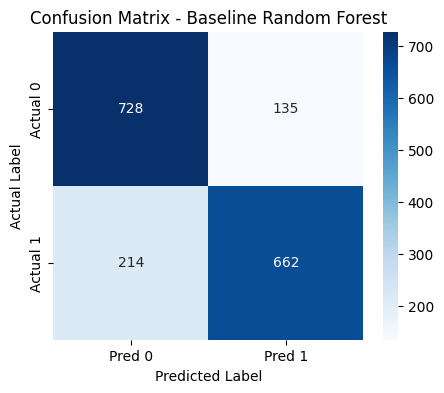

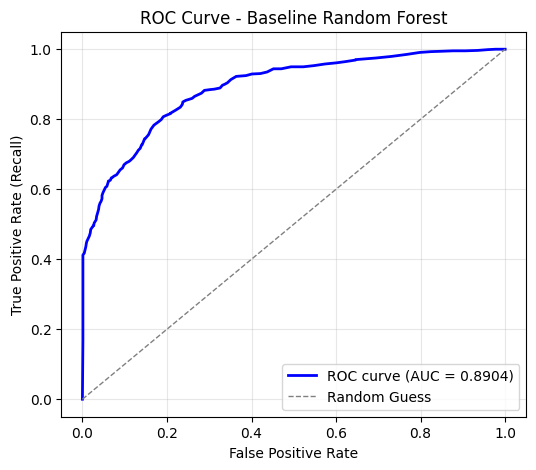

In [ ]:
# ==========================================================
# MATRIX AKURASI (Evaluasi Lengkap + ROC Curve)
# ==========================================================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import numpy as np

# Prediksi ulang dan probabilitas
baseline_pred = baseline_model.predict(X_test)
baseline_prob = baseline_model.predict_proba(X_test)[:, 1]

# Hitung metrik evaluasi lengkap
accuracy = accuracy_score(y_test, baseline_pred)
precision = precision_score(y_test, baseline_pred)
recall = recall_score(y_test, baseline_pred)
f1 = f1_score(y_test, baseline_pred)
roc_auc = roc_auc_score(y_test, baseline_prob)

# Confusion Matrix
cm = confusion_matrix(y_test, baseline_pred)
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

# Tampilkan hasil evaluasi lengkap (dalam persen)
print("📊 EVALUASI METRIK LENGKAP (BASELINE RANDOM FOREST)")
print("----------------------------------------------------")

print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}\n")

print(f"Accuracy     : {accuracy*100:.2f}%")
print(f"Precision    : {precision*100:.2f}%")
print(f"Recall       : {recall*100:.2f}%")
print(f"F1-Score     : {f1*100:.2f}%")
print(f"Specificity  : {specificity*100:.2f}%")
print(f"False Positive Rate (FPR): {fpr*100:.2f}%")
print(f"ROC-AUC      : {roc_auc*100:.2f}%")

# ==========================================================
# VISUAL CONFUSION MATRIX
# ==========================================================
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - Baseline Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


# ==========================================================
# Visualisasi Kurva ROC
# ==========================================================
fpr_curve, tpr_curve, thresholds = roc_curve(y_test, baseline_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr_curve, tpr_curve, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Baseline Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


Confusion Matrix (Menunjukkan distribusi prediksi model):
- 728 (True Negative) → benar diprediksi sebagai kelas 0.
- 135 (False Positive) → salah diprediksi positif, padahal sebenarnya negatif.
- 662 (True Positive) → benar diprediksi sebagai kelas 1.
- 214 (False Negative) → salah diprediksi negatif, padahal sebenarnya positif.

Metrik Evaluasi:
- Accuracy (79.93%) → menunjukkan bahwa hampir 80% dari seluruh prediksi model sudah benar.
- Precision (83.06%) → dari semua data yang diprediksi positif, 83% benar-benar positif. Artinya, model cukup baik dalam menghindari false positive.
- Recall (75.57%) → dari semua data yang benar-benar positif, 75% berhasil dideteksi oleh model.
- F1-Score (79.14%) → merupakan keseimbangan antara precision dan recall. Nilai 79% menunjukkan kinerja model yang stabil antara dua aspek tersebut.
- Specificity (84.36%) → menunjukkan kemampuan model mengenali kelas negatif dengan baik.
- False Positive Rate (15.64%) → persentase kesalahan prediksi positif padahal sebenarnya negatif.
- ROC-AUC (89.04%) → skor area di bawah kurva ROC; semakin mendekati 1 berarti performa klasifikasi semakin baik. Nilai 0.89 menandakan model memiliki kemampuan pemisahan kelas yang sangat baik.

ROC Curve:
- Kurva ROC menggambarkan keseimbangan antara True Positive Rate (Recall) dan False Positive Rate pada berbagai ambang keputusan.
- Garis biru menunjukkan performa model Random Forest.
- Garis abu-abu putus-putus adalah random guess (prediksi acak).
- Kurva biru yang berada jauh di atas garis acak menunjukkan model memiliki

kemampuan klasifikasi yang kuat dengan AUC = 0.8904, menandakan performa sangat baik dalam membedakan kelas positif dan negatif.

#Optimasi Hyperparameter (Grid Search CV)

In [ ]:
# ==========================================================
# RANDOM FOREST MODELING DENGAN GRID SEARCH CV
# ==========================================================
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
from google.colab import drive
import os

# ==========================================================
# MOUNT GOOGLE DRIVE DAN BUAT FOLDER TUJUAN
# ==========================================================
drive.mount('/content/drive')
save_path = "/content/drive/MyDrive/spaceship_titanic/Model"
os.makedirs(save_path, exist_ok=True)

# ==========================================================
# DEFINISI PARAMETER GRID UNTUK TUNING
# ==========================================================
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 6, 12],
    'min_samples_leaf': [2,4,5],
    'max_features': ['sqrt', None],
    'criterion': ['entropy']
}

# ==========================================================
# GRID SEARCH CV UNTUK MENCARI PARAMETER TERBAIK
# ==========================================================
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\n✅ Grid Search selesai!")
print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Score: {grid_search.best_score_:.4f}")

# ==========================================================
# MODEL AKHIR (BEST ESTIMATOR)
# ==========================================================
best_model = grid_search.best_estimator_

# Prediksi pada data uji
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ==========================================================
# SIMPAN MODEL TERBAIK KE GOOGLE DRIVE
# ==========================================================
model_filename = os.path.join(save_path, "best_random_forest_grid.pkl")
joblib.dump(best_model, model_filename)

print(f"💾 Model terbaik disimpan di: {model_filename}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 5 folds for each of 72 candidates, totalling 360 fits

✅ Grid Search selesai!
Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 200}
Best CV Score: 0.8016
💾 Model terbaik disimpan di: /content/drive/MyDrive/spaceship_titanic/Model/best_random_forest_grid.pkl


Grid Search CV (Cross-Validation) adalah metode pencarian sistematis untuk menemukan kombinasi parameter terbaik dari sebuah model dengan cara mencoba semua kemungkinan nilai parameter yang telah ditentukan. Dalam kode di atas, Grid Search digunakan untuk melakukan hyperparameter tuning pada Random Forest Classifier dengan mengevaluasi berbagai kombinasi parameter seperti jumlah pohon (n_estimators), kedalaman maksimum (max_depth), jumlah minimum sampel per split, dan lainnya. Proses ini dilakukan menggunakan 5-fold cross-validation, sehingga setiap kombinasi diuji secara menyeluruh untuk mendapatkan performa rata-rata terbaik. Setelah selesai, Grid Search memilih model dengan parameter optimal (best_estimator_) yang kemudian digunakan untuk melakukan prediksi dan disimpan ke Google Drive.

# Evaluasi dari Optimasi Hyperparameter (Grid Search CV)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model Random Forest (Grid Search) berhasil dimuat!

📊 EVALUASI METRIK LENGKAP (BEST RANDOM FOREST - GRID SEARCH)
--------------------------------------------------------------
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     700                     163
Actual Positive (1)                     179                     697


Accuracy     : 80.33%
Precision    : 81.05%
Recall (TPR) : 79.57%
F1-Score     : 80.30%
Specificity  : 81.11%
FPR          : 18.89%
ROC-AUC      : 89.83%


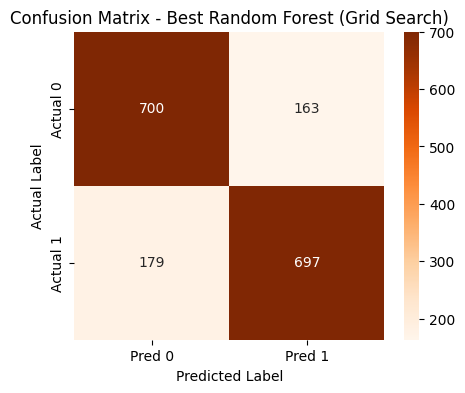

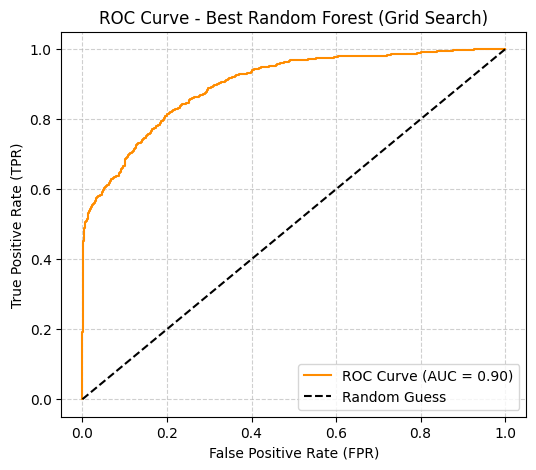

In [ ]:
# ==========================================================
# IMPORT LIBRARY
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)
from google.colab import drive

# ==========================================================
# MOUNT GOOGLE DRIVE
# ==========================================================
drive.mount('/content/drive')

# ==========================================================
# LOAD MODEL TERBAIK (RANDOM FOREST - GRID SEARCH)
# ==========================================================
model_path = "/content/drive/MyDrive/spaceship_titanic/Model/best_random_forest_grid.pkl"
best_rf_grid = joblib.load(model_path)
print("✅ Model Random Forest (Grid Search) berhasil dimuat!")

# ==========================================================
# PREDIKSI DATA TEST
# ==========================================================
y_pred = best_rf_grid.predict(X_test)
y_pred_proba = best_rf_grid.predict_proba(X_test)[:, 1]

# ==========================================================
# EVALUASI MODEL
# ==========================================================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Tambahan metrik
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

# ==========================================================
# TAMPILKAN HASIL
# ==========================================================
print("\n📊 EVALUASI METRIK LENGKAP (BEST RANDOM FOREST - GRID SEARCH)")
print("--------------------------------------------------------------")
print(pd.DataFrame(cm,
                   index=["Actual Negative (0)", "Actual Positive (1)"],
                   columns=["Predicted Negative (0)", "Predicted Positive (1)"]))
print("\n")

print(f"Accuracy     : {accuracy * 100:.2f}%")
print(f"Precision    : {precision * 100:.2f}%")
print(f"Recall (TPR) : {recall * 100:.2f}%")
print(f"F1-Score     : {f1 * 100:.2f}%")
print(f"Specificity  : {specificity * 100:.2f}%")
print(f"FPR          : {fpr * 100:.2f}%")
print(f"ROC-AUC      : {roc_auc * 100:.2f}%")

# ==========================================================
# VISUALISASI CONFUSION MATRIX
# ==========================================================
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - Best Random Forest (Grid Search)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ==========================================================
# KURVA ROC
# ==========================================================
fpr_values, tpr_values, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Best Random Forest (Grid Search)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Randomized Search CV

In [ ]:
# ==========================================================
# RANDOM FOREST MODELING DENGAN RANDOMIZED SEARCH CV
# ==========================================================
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
from google.colab import drive
import os

# ==========================================================
# MOUNT GOOGLE DRIVE DAN BUAT FOLDER TUJUAN
# ==========================================================
drive.mount('/content/drive')
save_path = "/content/drive/MyDrive/spaceship_titanic/Model"
os.makedirs(save_path, exist_ok=True)

# ==========================================================
# RANDOMIZED SEARCH UNTUK HYPERPARAMETER TUNING
# ==========================================================
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=25,        # hanya 25 kombinasi acak agar efisien
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Proses tuning
random_search.fit(X_train, y_train)

print("\n✅ Random Search selesai!")
print("Best Parameters:", random_search.best_params_)
print(f"Best CV Score: {random_search.best_score_:.4f}")

# ==========================================================
# MODEL AKHIR (BEST ESTIMATOR)
# ==========================================================
best_model = random_search.best_estimator_

# Prediksi
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ==========================================================
# SIMPAN MODEL TERBAIK KE GOOGLE DRIVE
# ==========================================================
model_filename = os.path.join(save_path, "best_random_forest_randomsearch.pkl")
joblib.dump(best_model, model_filename)

print(f"💾 Model terbaik disimpan di: {model_filename}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 5 folds for each of 25 candidates, totalling 125 fits

✅ Random Search selesai!
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}
Best CV Score: 0.8018
💾 Model terbaik disimpan di: /content/drive/MyDrive/spaceship_titanic/Model/best_random_forest_randomsearch.pkl


Randomized Search CV (Cross-Validation) adalah metode pencarian parameter terbaik (hyperparameter tuning) yang bekerja dengan cara memilih kombinasi parameter secara acak dari ruang parameter yang telah ditentukan, bukan mencoba semua kombinasi seperti pada Grid Search. Pendekatan ini jauh lebih efisien karena menghemat waktu komputasi, terutama ketika jumlah parameter dan nilai yang diuji sangat banyak. Dalam kode di atas, RandomizedSearchCV digunakan untuk mengoptimalkan model Random Forest Classifier dengan menguji 25 kombinasi acak dari parameter seperti jumlah pohon (n_estimators), kedalaman maksimum (max_depth), dan kriteria pemisahan (criterion). Prosesnya dilakukan menggunakan 5-fold cross-validation untuk memastikan hasil yang konsisten dan menghindari overfitting. Setelah menemukan parameter terbaik, model hasil tuning (best_estimator_) digunakan untuk prediksi dan disimpan ke Google Drive.

# Evaluasi dari Randomized Search CV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model Random Forest terbaik berhasil dimuat!

📊 EVALUASI METRIK LENGKAP (BEST RANDOM FOREST)
----------------------------------------------------
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     703                     160
Actual Positive (1)                     182                     694


Accuracy     : 80.33%
Precision    : 81.26%
Recall (TPR) : 79.22%
F1-Score     : 80.23%
Specificity  : 81.46%
FPR          : 18.54%
ROC-AUC      : 89.81%


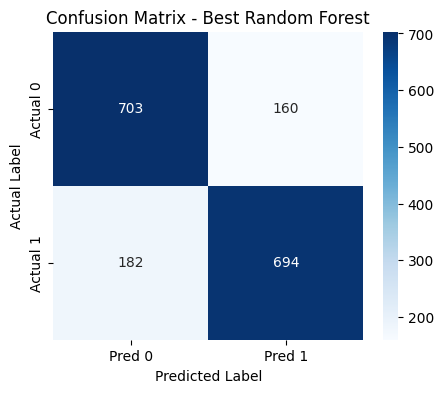

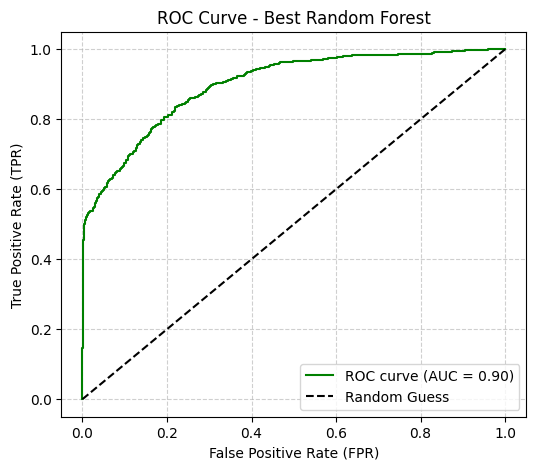

In [ ]:
# ==========================================================
# IMPORT LIBRARY
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)
from google.colab import drive

# ==========================================================
# MOUNT GOOGLE DRIVE
# ==========================================================
drive.mount('/content/drive')

# ==========================================================
# LOAD MODEL TERBAIK (RANDOM FOREST)
# ==========================================================
model_path = "/content/drive/MyDrive/spaceship_titanic/Model/best_random_forest_randomsearch.pkl"
best_rf_model = joblib.load(model_path)
print("✅ Model Random Forest terbaik berhasil dimuat!")

# ==========================================================
# PREDIKSI DATA TEST
# ==========================================================
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# ==========================================================
# EVALUASI METRIK
# ==========================================================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrik tambahan
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

# ==========================================================
# TAMPILKAN HASIL DALAM BENTUK MATRIKS DAN PERSEN
# ==========================================================
print("\n📊 EVALUASI METRIK LENGKAP (BEST RANDOM FOREST)")
print("----------------------------------------------------")
print(pd.DataFrame(cm,
                   index=["Actual Negative (0)", "Actual Positive (1)"],
                   columns=["Predicted Negative (0)", "Predicted Positive (1)"]))
print("\n")

print(f"Accuracy     : {accuracy * 100:.2f}%")
print(f"Precision    : {precision * 100:.2f}%")
print(f"Recall (TPR) : {recall * 100:.2f}%")
print(f"F1-Score     : {f1 * 100:.2f}%")
print(f"Specificity  : {specificity * 100:.2f}%")
print(f"FPR          : {fpr * 100:.2f}%")
print(f"ROC-AUC      : {roc_auc * 100:.2f}%")

# ==========================================================
# VISUAL CONFUSION MATRIX
# ==========================================================
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - Best Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ==========================================================
# PLOT KURVA ROC
# ==========================================================
fpr_values, tpr_values, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_values, tpr_values, label=f"ROC curve (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Best Random Forest")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Metrik Evaluasi:
- Accuracy (80.33%) → model berhasil memprediksi dengan benar sekitar 80% dari data uji.
- Precision (81.26%) → dari seluruh prediksi positif, sekitar 81% benar-benar positif, menunjukkan sedikit kesalahan dalam prediksi positif.
- Recall / TPR (79.22%) → sekitar 79% dari data positif berhasil dikenali oleh model.
- F1-Score (80.23%) → keseimbangan antara precision dan recall yang cukup stabil.
- Specificity (81.46%) → model juga cukup baik dalam mengenali data negatif.
- FPR (18.54%) → proporsi negatif yang salah diklasifikasikan sebagai positif relatif kecil.
- ROC-AUC (89.81%) → nilai AUC mendekati 0.9 menandakan kemampuan model yang sangat baik dalam membedakan antara dua kelas.

Confusion Matrix:
- 703 (True Negative) → data negatif yang diprediksi benar.
- 160 (False Positive) → data negatif yang salah diprediksi sebagai positif.
- 694 (True Positive) → data positif yang diprediksi benar.
- 182 (False Negative) → data positif yang gagal dikenali.

ROC Curve:
- Garis hijau menunjukkan performa model; semakin melengkung ke kiri atas, semakin baik.
- Garis putus-putus hitam adalah acuan prediksi acak (random guess).

Karena kurva hijau jauh di atas garis acak dengan AUC = 0.90, model memiliki kemampuan klasifikasi yang sangat kuat.

Kesimpulan:

Model Random Forest hasil tuning mencapai performa yang seimbang antara akurasi, presisi, dan recall dengan nilai AUC tinggi (0.90). Hal ini menunjukkan model mampu membedakan kelas dengan baik serta memberikan hasil yang lebih stabil dibandingkan baseline sebelumnya.

# Prediksi Menggunakan Randomized Search CV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib
import pandas as pd

# ============================================
# 1. LOAD MODEL TERBAIK
# ============================================
model_path = "/content/drive/MyDrive/spaceship_titanic/Model/best_random_forest_randomsearch.pkl"
model = joblib.load(model_path)

# ============================================
# 2. INPUT DATA DARI USER
# ============================================
print("=== INPUT DATA PENUMPANG ===")

HomePlanet = input("HomePlanet (Earth/Mars/Europa): ")
CryoSleep = input("CryoSleep (True/False): ")
Cabin = input("Cabin (misal: B/0/P): ")
Destination = input("Destination (TRAPPIST-1e/55 Cancri e/PSO J318.5-22): ")
Age = float(input("Age: "))
VIP = input("VIP (True/False): ")
RoomService = float(input("RoomService: "))
FoodCourt = float(input("FoodCourt: "))
ShoppingMall = float(input("ShoppingMall: "))
Spa = float(input("Spa: "))
VRDeck = float(input("VRDeck: "))

# ============================================
# 3. BUAT DATAFRAME
# ============================================
input_df = pd.DataFrame({
    "HomePlanet": [HomePlanet],
    "CryoSleep": [CryoSleep == "True"],
    "Cabin": [Cabin],
    "Destination": [Destination],
    "Age": [Age],
    "VIP": [VIP == "True"],
    "RoomService": [RoomService],
    "FoodCourt": [FoodCourt],
    "ShoppingMall": [ShoppingMall],
    "Spa": [Spa],
    "VRDeck": [VRDeck]
})

# ============================================
# 4. PREPROCESSING PERSIS SEPERTI TRAINING
# (sesuaikan dengan preprocessing asli kamu)
# ============================================

# Pisahkan Cabin menjadi 3 bagian
input_df[['CabinDeck', 'CabinNum', 'CabinSide']] = input_df['Cabin'].str.split('/', expand=True)
input_df.drop(columns=['Cabin'], inplace=True)

# Convert numerik
input_df['CabinNum'] = pd.to_numeric(input_df['CabinNum'], errors='coerce')

# One-hot encoding kategori
categorical_cols = ['HomePlanet', 'CabinDeck', 'CabinSide', 'Destination']
input_df = pd.get_dummies(input_df, columns=categorical_cols)

# ============================================
# 5. SESUAIKAN KOLOM INPUT DENGAN KOLOM MODEL
# ============================================
training_cols = model.feature_names_in_
for col in training_cols:
    if col not in input_df.columns:
        input_df[col] = 0

input_df = input_df[training_cols]

# ============================================
# 6. PREDIKSI
# ============================================
prediction = model.predict(input_df)[0]
proba = model.predict_proba(input_df)[0][1]

# ============================================
# 7. OUTPUT HASIL
# ============================================
print("\n=== HASIL PREDIKSI ===")
print(f"Prediksi Transported : {prediction}")
print(f"Peluang (Probability): {proba:.4f}")

if prediction == 1:
    print("✅ Penumpang kemungkinan DITRANSPORTASI ke dimensi lain.")
else:
    print("❌ Penumpang kemungkinan TIDAK DITRANSPORTASI.")


=== INPUT DATA PENUMPANG ===
HomePlanet (Earth/Mars/Europa): Earth
CryoSleep (True/False): False
Cabin (misal: B/0/P): B/1/3
Destination (TRAPPIST-1e/55 Cancri e/PSO J318.5-22): 55 Cancri e
Age: 13
VIP (True/False): False
RoomService: 100
FoodCourt: 0
ShoppingMall: 20
Spa: 10
VRDeck: 30

=== HASIL PREDIKSI ===
Prediksi Transported : 0
Peluang (Probability): 0.4903
❌ Penumpang kemungkinan TIDAK DITRANSPORTASI.


Pada tahapan ini, user bisa input data penumpang secara manual seperti HomePlanet, usia, biaya layanan, hingga detail kabin. Setelah itu, data diubah menjadi DataFrame dan dipreproses sama seperti saat training: memecah kolom Cabin menjadi tiga bagian, mengonversi CabinNum menjadi numerik, serta melakukan one-hot encoding untuk kolom kategorikal. Selanjutnya, kolom input disesuaikan dengan kolom yang digunakan oleh model agar urutan dan jumlahnya cocok. Setelah data siap, model melakukan prediksi apakah penumpang akan “Transported” atau tidak, sekaligus memberikan probabilitasnya. Hasilnya kemudian ditampilkan ke pengguna dalam bentuk prediksi dan peluang.

# Prediksi Data test.csv

In [ ]:
import pandas as pd
import joblib
from google.colab import drive
import os

# ==========================================================
# 1. MOUNT GOOGLE DRIVE
# ==========================================================
drive.mount('/content/drive')

# Path file
test_path = "/content/drive/MyDrive/spaceship_titanic/test_final_normalized.csv"
test_raw_path = "/content/drive/MyDrive/spaceship_titanic/test.csv"
model_path = "/content/drive/MyDrive/spaceship_titanic/Model/best_random_forest_randomsearch.pkl"

# ==========================================================
# 2. LOAD DATA & MODEL
# ==========================================================
df_test = pd.read_csv(test_path)
df_raw = pd.read_csv(test_raw_path)   # untuk ambil PassengerId
model = joblib.load(model_path)

print("✅ Test data & model loaded!")

# Ambil PassengerId dari file asli
passenger_ids = df_raw["PassengerId"].copy()

# ==========================================================
# 3. PREDIKSI LANGSUNG
# ==========================================================
predictions = model.predict(df_test)

# ==========================================================
# 4. GABUNGKAN DENGAN PassengerId & SIMPAN
# ==========================================================
df_result = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": predictions.astype(bool)   # Convert ke True/False biar sesuai format Kaggle
})

save_path = "/content/drive/MyDrive/spaceship_titanic/submission_randomsearch.csv"
df_result.to_csv(save_path, index=False)

print(f"✅ Prediksi selesai! File tersimpan di:\n{save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Test data & model loaded!
✅ Prediksi selesai! File tersimpan di:
/content/drive/MyDrive/spaceship_titanic/submission_randomsearch.csv


Tahap ini memuat data uji (versi yang sudah dinormalisasi dan versi mentah) serta model Random Forest terbaik dari Google Drive, lalu menggunakan PassengerId dari data mentah agar hasil prediksi tetap sesuai format kompetisi. Model kemudian langsung memprediksi apakah setiap penumpang akan “Transported” berdasarkan df_test, dan hasil prediksi tersebut digabungkan kembali dengan PassengerId ke dalam sebuah DataFrame baru. Terakhir, hasil prediksi disimpan sebagai file submission_randomsearch.csv di Google Drive dalam format yang diminta Kaggle, yaitu kolom PassengerId dan Transported (True/False).

# Menggunakan Metode XGBosst

In [ ]:
!pip install xgboost


In [ ]:
# ==========================================================
# XGBOOST MODELING MENGGUNAKAN train_split.csv DAN test_split.csv
# ==========================================================
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from google.colab import drive
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================================
# MOUNT GOOGLE DRIVE
# ==========================================================
drive.mount('/content/drive')

# Folder utama
base_path = "/content/drive/MyDrive/spaceship_titanic"
train_file = os.path.join(base_path, "train_split.csv")
test_file  = os.path.join(base_path, "test_split.csv")

# ==========================================================
# LOAD DATA
# ==========================================================
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

X_train = train_df.drop(columns=["Transported"])
y_train = train_df["Transported"]

X_test = test_df.drop(columns=["Transported"])
y_test = test_df["Transported"]

# ==========================================================
# TRAIN MODEL XGBOOST
# ==========================================================
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    objective='binary:logistic',
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
print("✅ Training XGBoost selesai!")

# ==========================================================
# PREDIKSI
# ==========================================================
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]   # ✅ DITAMBAHKAN

# ==========================================================
# SIMPAN MODEL
# ==========================================================
model_path = os.path.join(base_path, "xgboost_model.pkl")
joblib.dump(xgb_model, model_path)
print(f"💾 Model disimpan di: {model_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Training XGBoost selesai!
💾 Model disimpan di: /content/drive/MyDrive/spaceship_titanic/xgboost_model.pkl


Penjelasan Parameter:

* n_estimators=200	: Jumlah pohon (tree) yang akan dibangun — makin banyak, makin kuat tapi bisa overfit.
* max_depth=6	: Kedalaman maksimum tiap pohon — makin dalam, makin kompleks tapi bisa overfit.
* learning_rate=0.1 :	Kecepatan belajar model — nilai kecil membuat belajar lambat tapi lebih stabil.
* subsample=0.9	: Persentase data training yang digunakan tiap pohon — mencegah overfitting.
* colsample_bytree=0.9 : Persentase fitur (kolom) yang digunakan tiap pohon — juga mencegah overfitting.
* random_state=42	: Angka acak agar hasil selalu konsisten setiap dijalankan.
* objective='binary:logistic'	: Menentukan jenis tugas, di sini untuk klasifikasi biner (dua kelas).
* eval_metric='logloss'	: Metrik evaluasi selama training — semakin kecil nilainya semakin baik.


📊 EVALUASI METRIK LENGKAP (XGBOOST)
--------------------------------------------------------------
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     701                     162
Actual Positive (1)                     177                     699


Accuracy     : 80.51%
Precision    : 81.18%
Recall (TPR) : 79.79%
F1-Score     : 80.48%
Specificity  : 81.23%
FPR          : 18.77%
ROC-AUC      : 90.36%


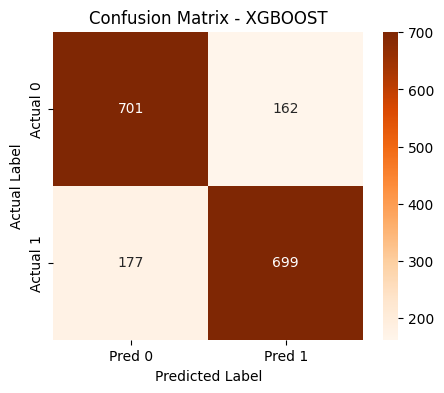

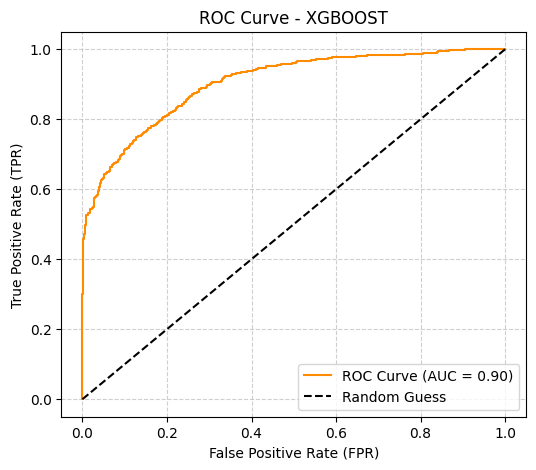

In [ ]:
# ==========================================================
# EVALUASI MODEL
# ==========================================================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Tambahan metrik
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

# ==========================================================
# TAMPILKAN HASIL
# ==========================================================
print("\n📊 EVALUASI METRIK LENGKAP (XGBOOST)")
print("--------------------------------------------------------------")
print(pd.DataFrame(cm,
                   index=["Actual Negative (0)", "Actual Positive (1)"],
                   columns=["Predicted Negative (0)", "Predicted Positive (1)"]))
print("\n")

print(f"Accuracy     : {accuracy * 100:.2f}%")
print(f"Precision    : {precision * 100:.2f}%")
print(f"Recall (TPR) : {recall * 100:.2f}%")
print(f"F1-Score     : {f1 * 100:.2f}%")
print(f"Specificity  : {specificity * 100:.2f}%")
print(f"FPR          : {fpr * 100:.2f}%")
print(f"ROC-AUC      : {roc_auc * 100:.2f}%")

# ==========================================================
# VISUALISASI CONFUSION MATRIX
# ==========================================================
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - XGBOOST")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ==========================================================
# KURVA ROC
# ==========================================================
fpr_values, tpr_values, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - XGBOOST")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Menggunakan Catboost

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
# ==========================================================
# CATBOOST MODELING
# ==========================================================
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from google.colab import drive
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================================
# MOUNT GOOGLE DRIVE
# ==========================================================
drive.mount('/content/drive')

# Folder utama
base_path = "/content/drive/MyDrive/spaceship_titanic"
train_file = os.path.join(base_path, "train_split.csv")
test_file  = os.path.join(base_path, "test_split.csv")

# ==========================================================
# LOAD DATA
# ==========================================================
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

X_train = train_df.drop(columns=["Transported"])
y_train = train_df["Transported"]

X_test = test_df.drop(columns=["Transported"])
y_test = test_df["Transported"]

# ==========================================================
# TRAIN MODEL CATBOOST
# ==========================================================
cat_model = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=50
)

cat_model.fit(X_train, y_train)
print("✅ Training CatBoost selesai!")

# ==========================================================
# PREDIKSI
# ==========================================================
y_pred = cat_model.predict(X_test)
y_pred = y_pred.astype(int)   # CatBoost output float → ubah ke int

y_pred_proba = cat_model.predict_proba(X_test)[:, 1]   # ✅ kompatibel evaluasi

# ==========================================================
# SIMPAN MODEL
# ==========================================================
model_path = os.path.join(base_path, "catboost_model.cbm")
cat_model.save_model(model_path)

print(f"💾 Model CatBoost disimpan di: {model_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0:	total: 79.2ms	remaining: 23.7s
50:	total: 683ms	remaining: 3.33s
100:	total: 1.12s	remaining: 2.21s
150:	total: 1.82s	remaining: 1.8s
200:	total: 2.54s	remaining: 1.25s
250:	total: 3.07s	remaining: 599ms
299:	total: 3.63s	remaining: 0us
✅ Training CatBoost selesai!
💾 Model CatBoost disimpan di: /content/drive/MyDrive/spaceship_titanic/catboost_model.cbm


Penjelasan Parameter :
* iterations=300 :	Jumlah total pohon (tree) yang akan dibangun — semakin banyak, model lebih kuat tapi bisa overfit.
* depth=6	: Kedalaman maksimum tiap pohon — mengontrol kompleksitas model.
* learning_rate=0.1 :	Kecepatan belajar model — nilai kecil memberi hasil lebih stabil tapi butuh lebih banyak iterasi.
* loss_function='Logloss' :	Fungsi kerugian untuk klasifikasi biner (mengukur selisih antara prediksi & label sebenarnya).
* eval_metric='AUC' :	Metrik evaluasi selama training — AUC menilai kemampuan model membedakan antara dua kelas.
* random_seed=42 : Supaya hasil eksperimen selalu sama (reproducible).
* verbose=50	: Menampilkan progress training setiap 50 iterasi di output terminal.


📊 EVALUASI METRIK LENGKAP (CATBOOST)
--------------------------------------------------------------
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     695                     168
Actual Positive (1)                     152                     724


Accuracy     : 81.60%
Precision    : 81.17%
Recall (TPR) : 82.65%
F1-Score     : 81.90%
Specificity  : 80.53%
FPR          : 19.47%
ROC-AUC      : 91.03%


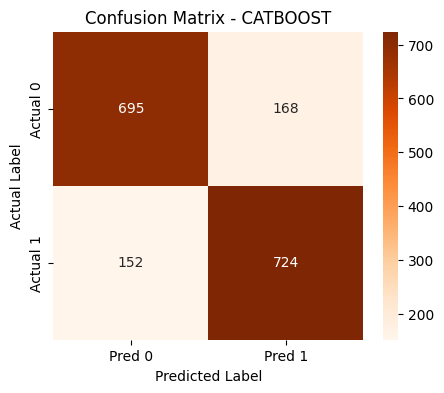

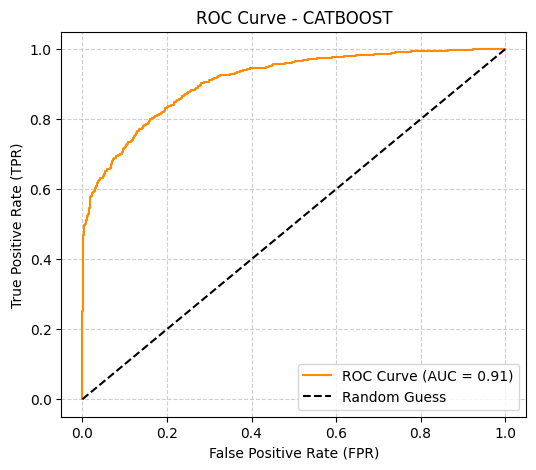

In [ ]:
# ==========================================================
# EVALUASI MODEL
# ==========================================================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Tambahan metrik
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

# ==========================================================
# TAMPILKAN HASIL
# ==========================================================
print("\n📊 EVALUASI METRIK LENGKAP (CATBOOST)")
print("--------------------------------------------------------------")
print(pd.DataFrame(cm,
                   index=["Actual Negative (0)", "Actual Positive (1)"],
                   columns=["Predicted Negative (0)", "Predicted Positive (1)"]))
print("\n")

print(f"Accuracy     : {accuracy * 100:.2f}%")
print(f"Precision    : {precision * 100:.2f}%")
print(f"Recall (TPR) : {recall * 100:.2f}%")
print(f"F1-Score     : {f1 * 100:.2f}%")
print(f"Specificity  : {specificity * 100:.2f}%")
print(f"FPR          : {fpr * 100:.2f}%")
print(f"ROC-AUC      : {roc_auc * 100:.2f}%")

# ==========================================================
# VISUALISASI CONFUSION MATRIX
# ==========================================================
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - CATBOOST")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ==========================================================
# KURVA ROC
# ==========================================================
fpr_values, tpr_values, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - CATBOOST")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# ==========================================================
# CATBOOST MODELING (HIGH ACCURACY VERSION)
# ==========================================================
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
from google.colab import drive
import os

# ==========================================================
# MOUNT GOOGLE DRIVE
# ==========================================================
drive.mount('/content/drive')

# Folder utama
base_path = "/content/drive/MyDrive/spaceship_titanic"
train_file = os.path.join(base_path, "train_split.csv")
test_file  = os.path.join(base_path, "test_split.csv")

# ==========================================================
# LOAD DATA
# ==========================================================
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

X_train = train_df.drop(columns=["Transported"])
y_train = train_df["Transported"]

X_test = test_df.drop(columns=["Transported"])
y_test = test_df["Transported"]

# ==========================================================
# CATBOOST HIGH ACCURACY MODEL
# ==========================================================
cat_model = CatBoostClassifier(
    iterations=1500,          # lebih besar → model lebih kuat
    depth=8,                  # lebih dalam untuk tangkap pola kompleks
    learning_rate=0.03,       # kecil supaya stabil
    l2_leaf_reg=7,            # regulasi mencegah overfitting
    bagging_temperature=1.5,  # lebih eksploratif
    subsample=0.9,            # generalisasi lebih bagus
    rsm=0.9,                  # colsample_bytree versi catboost
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)

# Train
cat_model.fit(X_train, y_train)
print("✅ Training CatBoost High Accuracy selesai!")

# ==========================================================
# PREDIKSI
# ==========================================================
y_pred = cat_model.predict(X_test).astype(int)
y_pred_proba = cat_model.predict_proba(X_test)[:, 1]

# ==========================================================
# SIMPAN MODEL
# ==========================================================
model_path = os.path.join(base_path, "catboost_high_accuracy.cbm")
cat_model.save_model(model_path)

print(f"💾 Model CatBoost disimpan di: {model_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0:	total: 116ms	remaining: 2m 53s
100:	total: 5.88s	remaining: 1m 21s
200:	total: 10.9s	remaining: 1m 10s
300:	total: 14.9s	remaining: 59.4s
400:	total: 19.3s	remaining: 52.8s
500:	total: 22.3s	remaining: 44.4s
600:	total: 24.8s	remaining: 37.1s
700:	total: 27.6s	remaining: 31.4s
800:	total: 32.1s	remaining: 28s
900:	total: 34.6s	remaining: 23s
1000:	total: 36.9s	remaining: 18.4s
1100:	total: 39s	remaining: 14.1s
1200:	total: 41.4s	remaining: 10.3s
1300:	total: 43.3s	remaining: 6.62s
1400:	total: 45.5s	remaining: 3.21s
1499:	total: 46.8s	remaining: 0us
✅ Training CatBoost High Accuracy selesai!
💾 Model CatBoost disimpan di: /content/drive/MyDrive/spaceship_titanic/catboost_high_accuracy.cbm


Penjelasan Parameter
* iterations=1500	: Jumlah total pohon (tree). Nilai besar membuat model lebih kuat, tapi waktu training lebih lama.
* depth=8	: Kedalaman maksimum tiap pohon. Semakin dalam, semakin kompleks pola yang bisa dipelajari.
* learning_rate=0.03	: Kecepatan pembelajaran. Nilai kecil membuat model belajar lebih halus dan stabil.
* l2_leaf_reg=7	: Regulasi L2 untuk mencegah overfitting dengan membatasi bobot node pada pohon.
* bagging_temperature=1.5	: Mengontrol tingkat eksplorasi saat sampling data; makin tinggi → sampling lebih acak.
* subsample=0.9 :	Persentase data yang digunakan di setiap iterasi untuk memperkuat generalisasi model.
* rsm=0.9 :	Persentase fitur (kolom) yang digunakan untuk setiap pohon — seperti colsample_bytree pada XGBoost.
* loss_function='Logloss'	: Fungsi kerugian untuk klasifikasi biner, mengukur * seberapa jauh prediksi dari label sebenarnya.
* eval_metric='AUC'	: Metrik evaluasi (Area Under Curve) — menilai kemampuan model membedakan dua kelas.
* random_seed=42	: Supaya hasil eksperimen konsisten tiap dijalankan.
* verbose=100	: Menampilkan progress training setiap 100 iterasi di output.


📊 EVALUASI METRIK LENGKAP (CATBOOST- HIGH ACCURACY)
--------------------------------------------------------------
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     716                     147
Actual Positive (1)                     156                     720


Accuracy     : 82.58%
Precision    : 83.04%
Recall (TPR) : 82.19%
F1-Score     : 82.62%
Specificity  : 82.97%
FPR          : 17.03%
ROC-AUC      : 91.06%


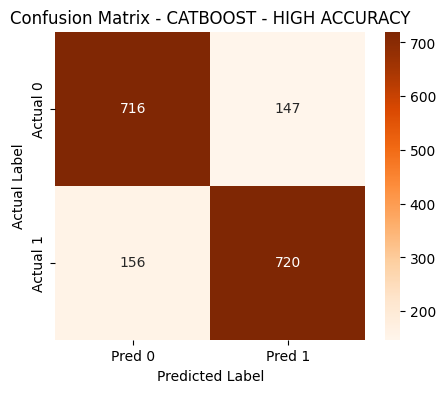

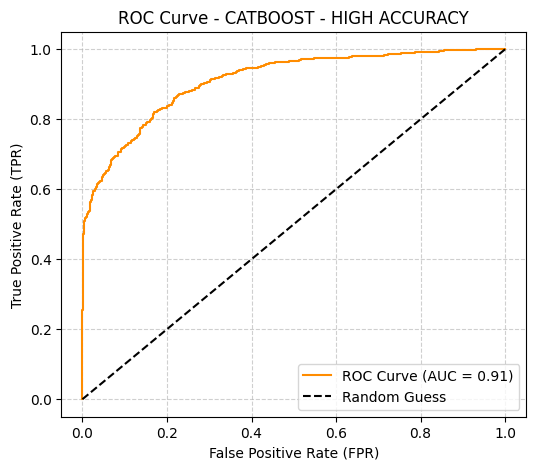

In [ ]:
# ==========================================================
# EVALUASI MODEL
# ==========================================================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Tambahan metrik
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

# ==========================================================
# TAMPILKAN HASIL
# ==========================================================
print("\n📊 EVALUASI METRIK LENGKAP (CATBOOST- HIGH ACCURACY)")
print("--------------------------------------------------------------")
print(pd.DataFrame(cm,
                   index=["Actual Negative (0)", "Actual Positive (1)"],
                   columns=["Predicted Negative (0)", "Predicted Positive (1)"]))
print("\n")

print(f"Accuracy     : {accuracy * 100:.2f}%")
print(f"Precision    : {precision * 100:.2f}%")
print(f"Recall (TPR) : {recall * 100:.2f}%")
print(f"F1-Score     : {f1 * 100:.2f}%")
print(f"Specificity  : {specificity * 100:.2f}%")
print(f"FPR          : {fpr * 100:.2f}%")
print(f"ROC-AUC      : {roc_auc * 100:.2f}%")

# ==========================================================
# VISUALISASI CONFUSION MATRIX
# ==========================================================
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - CATBOOST - HIGH ACCURACY")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ==========================================================
# KURVA ROC
# ==========================================================
fpr_values, tpr_values, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - CATBOOST - HIGH ACCURACY")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
import pandas as pd
import joblib
from google.colab import drive
import os
from catboost import CatBoostClassifier # Import CatBoostClassifier

# ==========================================================
# 1. MOUNT GOOGLE DRIVE
# ==========================================================
drive.mount('/content/drive')

# Path file
test_path = "/content/drive/MyDrive/spaceship_titanic/test_final_normalized.csv"
test_raw_path = "/content/drive/MyDrive/spaceship_titanic/test.csv"
model_path = "/content/drive/MyDrive/spaceship_titanic/catboost_high_accuracy.cbm"

# ==========================================================
# 2. LOAD DATA & MODEL
# ==========================================================
df_test = pd.read_csv(test_path)
df_raw = pd.read_csv(test_raw_path)   # untuk ambil PassengerId

# Memuat model CatBoost menggunakan metode CatBoost.load_model()
model = CatBoostClassifier().load_model(model_path)

print("✅ Test data & model loaded!")

# Ambil PassengerId dari file asli
passenger_ids = df_raw["PassengerId"].copy()

# ==========================================================
# 3. PREDIKSI LANGSUNG
# ==========================================================
predictions = model.predict(df_test)

# ==========================================================
# 4. GABUNGKAN DENGAN PassengerId & SIMPAN
# ==========================================================
df_result = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": predictions.astype(bool)   # Convert ke True/False biar sesuai format Kaggle
})

save_path = "/content/drive/MyDrive/spaceship_titanic/submission_catboost_high_accuracy.csv"
df_result.to_csv(save_path, index=False)

print(f"✅ Prediksi selesai! File tersimpan di:\n{save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Test data & model loaded!
✅ Prediksi selesai! File tersimpan di:
/content/drive/MyDrive/spaceship_titanic/submission_catboost_high_accuracy.csv
